<a href="https://colab.research.google.com/github/niteesh19mt0250/Zamato-Resturant-Clustering-and-Sentiment-Analysis/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**: Zamato Resturant Clustering and Sentiment Analysis


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/niteesh19mt0250/Zamato-Resturant-Clustering-and-Sentiment-Analysis-Unsupervised-.git

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msn
!pip install ipython_Autotime
%load_ext autotime
import datetime as dt



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.6 MB/s eta 0:00:00
time: 480 µs (started: 2023-07-13 17:12:16 +00:00)


### Dataset Loading

In [2]:
# Import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 1min 13s (started: 2023-07-13 17:12:16 +00:00)


In [3]:
# Load Dataset
df_restaurant = pd.read_csv('/content/drive/MyDrive/Project /Unsupervised Learning/Zomato Restaurant names and Metadata.csv')
df_review = pd.read_csv('/content/drive/MyDrive/Project /Unsupervised Learning/Zomato Restaurant reviews.csv')

time: 1.14 s (started: 2023-07-13 17:13:29 +00:00)


### Dataset First View

In [4]:
# Dataset First Look top 5 of zamato resturant name
df_restaurant.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


time: 24.4 ms (started: 2023-07-13 17:13:30 +00:00)


In [5]:
# Dataset First Look bottom 5 of zamato resturant name
df_restaurant.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


time: 15.6 ms (started: 2023-07-13 17:13:30 +00:00)


In [6]:
# Dataset First Look top 5 of zamato resturant review
df_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


time: 16.1 ms (started: 2023-07-13 17:13:30 +00:00)


In [7]:
# Dataset First Look bottom 5 of zamato resturant review
df_review.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


time: 14.6 ms (started: 2023-07-13 17:13:30 +00:00)


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count of zamato resturant name
print(f'Number of rows in the dataset: {df_restaurant.shape[0]} \n Number of columns in the dataset: {df_restaurant.shape[1]}')

Number of rows in the dataset: 105 
 Number of columns in the dataset: 6
time: 1.47 ms (started: 2023-07-13 17:13:30 +00:00)


In [9]:
# Dataset Rows & Columns count of zamato resturant review
print(f'Number of rows in the dataset: {df_review.shape[0]} \n Number of columns in the dataset: {df_review.shape[1]}')

Number of rows in the dataset: 10000 
 Number of columns in the dataset: 7
time: 1.79 ms (started: 2023-07-13 17:13:30 +00:00)


### Dataset Information

In [10]:
# Dataset Info of zamato restaurant name
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
time: 20.7 ms (started: 2023-07-13 17:13:30 +00:00)


In [11]:
# Dataset Info of zamato restaurant review
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
time: 39.8 ms (started: 2023-07-13 17:13:30 +00:00)


### Duplicate Values

In [12]:
# Dataset Duplicate Value Count in Zamato restaurant name dataset
print('Total number of duplicted value present in the zamato resturent name dataset:',df_restaurant.duplicated().sum())

Total number of duplicted value present in the zamato resturent name dataset: 0
time: 7.18 ms (started: 2023-07-13 17:13:30 +00:00)


In [13]:
# Dataset Duplicate Value Count in Zamato restaurant review dataset
print('Total number of duplicted value present in the zamato resturent review dataset:',df_review.duplicated().sum())

Total number of duplicted value present in the zamato resturent review dataset: 36
time: 35.4 ms (started: 2023-07-13 17:13:30 +00:00)


### Missing Values/Null Values

In [14]:
# Defining the missing function which the missing value description and bar plot of the missing value
def missing_func(df):
  missing_value = df.isnull().sum()
  percentage_of_missing_value = df.isnull().sum()*100/(df.shape[0])
  missing_table = pd.concat([missing_value,percentage_of_missing_value],axis = 1)
  missing_table = missing_table.rename(columns={df.index.name:'col_name',0:'missing_value',1:'% of missing values'})
  missing_table['Data_Type'] = df.dtypes
  msn.bar(df,color = 'skyblue')
  return missing_table

time: 856 µs (started: 2023-07-13 17:13:30 +00:00)


,missing_value,% of missing values,Data_Type
Name,0,0.000000,object
Links,0,0.000000,object
Cost,0,0.000000,object
Collections,54,51.428571,object
Cuisines,0,0.000000,object
Timings,1,0.952381,object


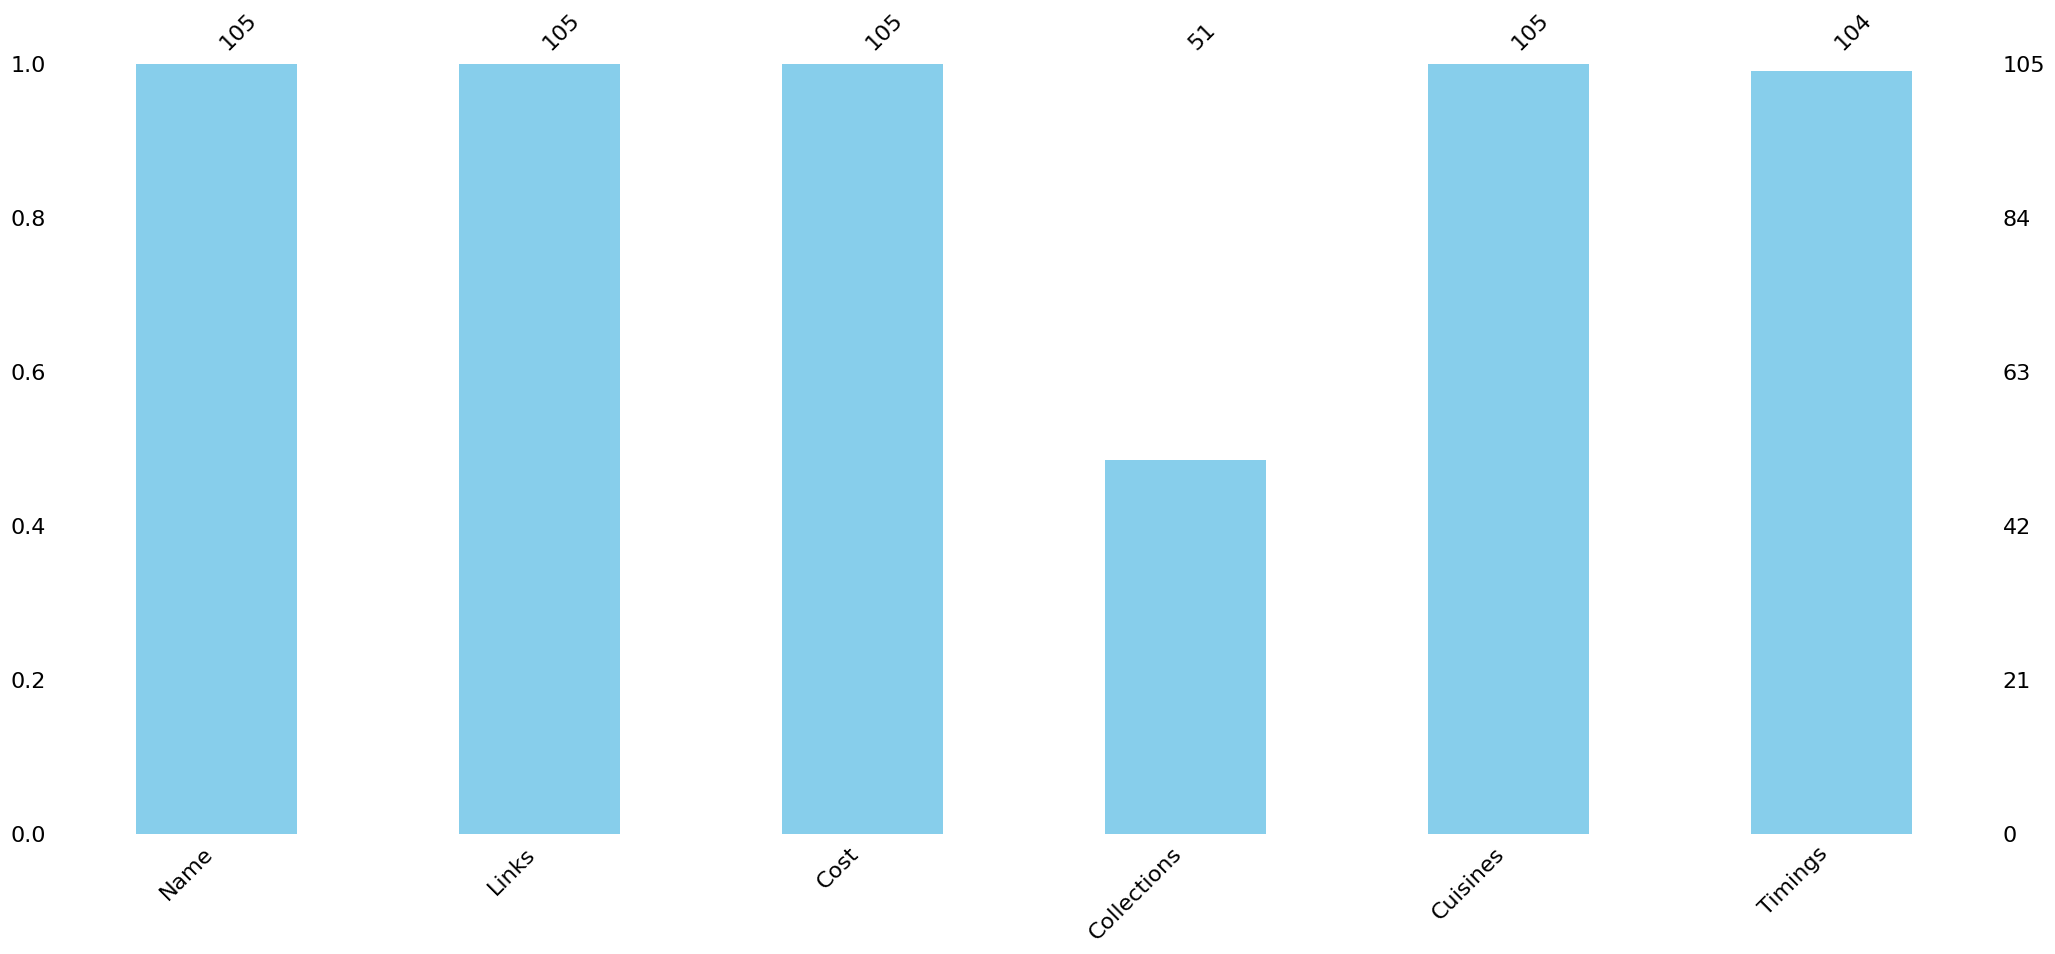

time: 1.64 s (started: 2023-07-13 17:13:30 +00:00)


In [15]:
# Missing Values/Null Values Count of zamato restaurent name dataset
missing_func(df_restaurant)

,missing_value,% of missing values,Data_Type
Restaurant,0,0.00,object
Reviewer,38,0.38,object
Review,45,0.45,object
Rating,38,0.38,object
Metadata,38,0.38,object
Time,38,0.38,object
Pictures,0,0.00,int64


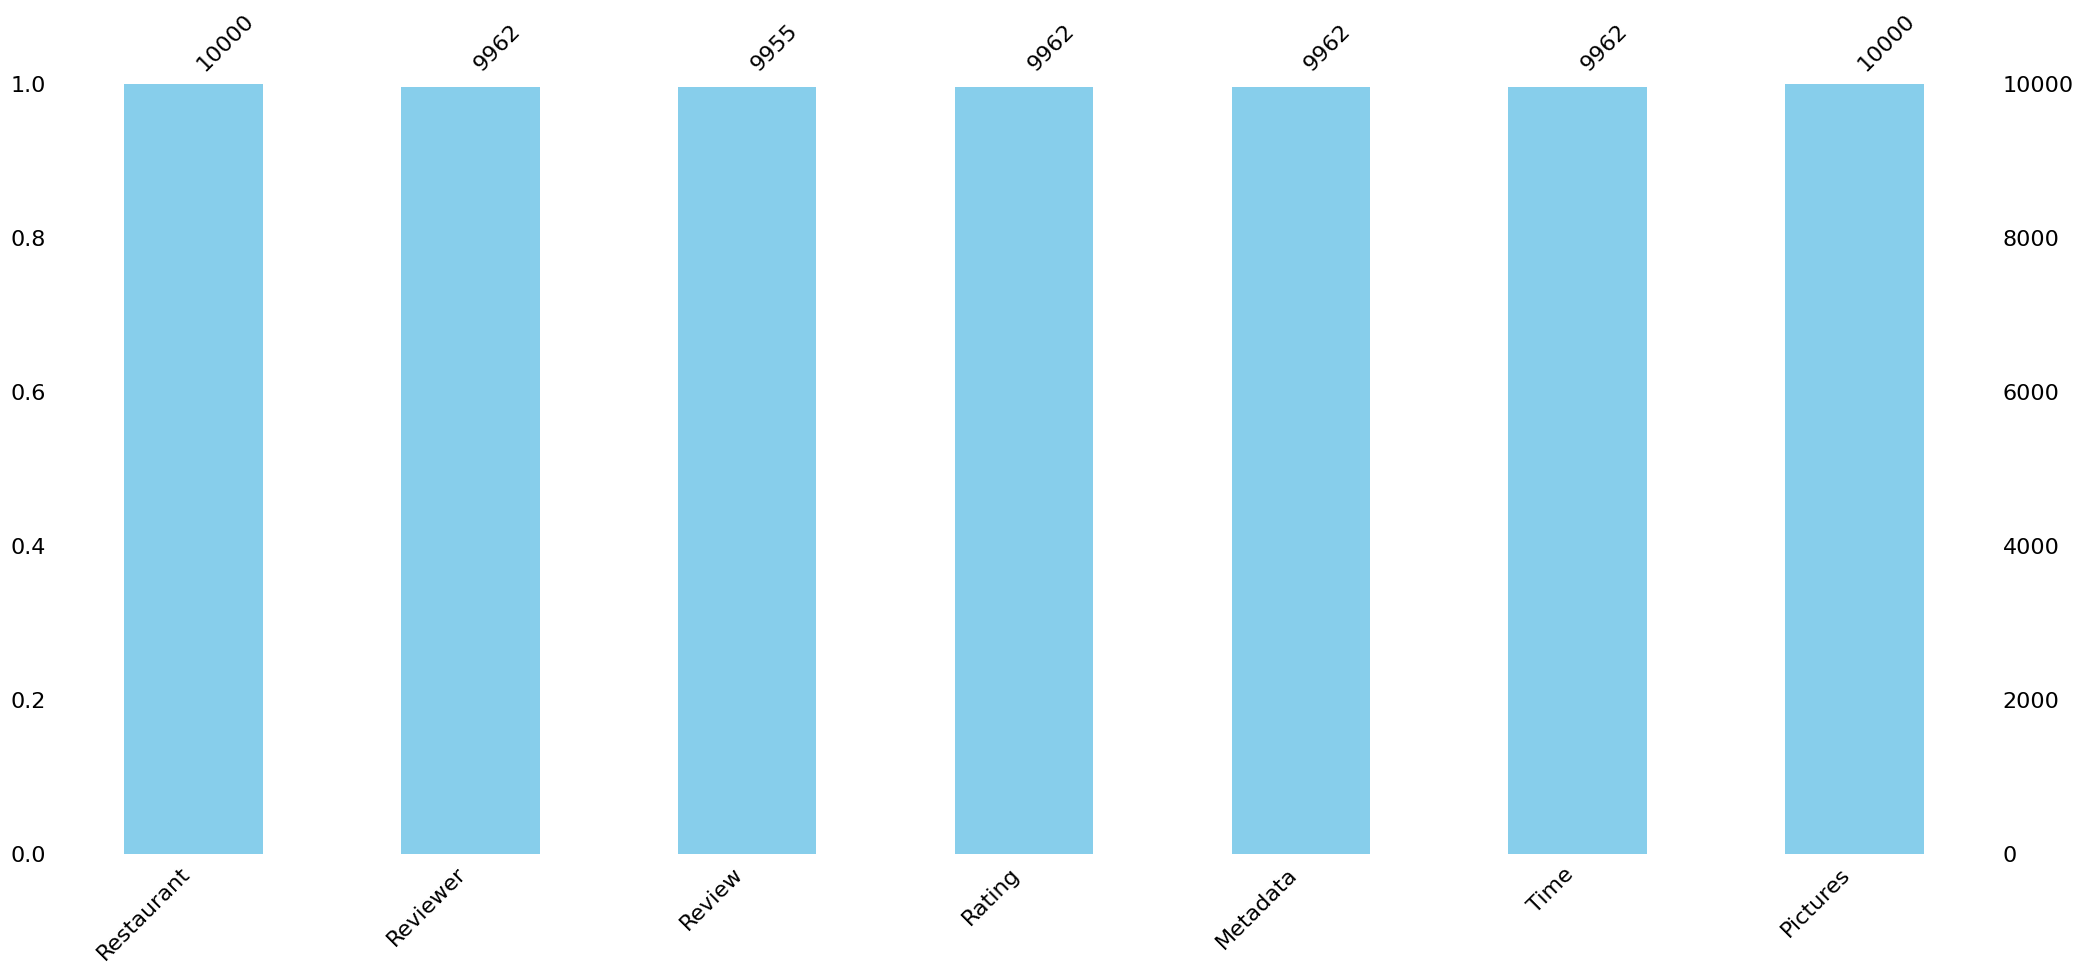

time: 1.22 s (started: 2023-07-13 17:13:32 +00:00)


In [16]:
# Missing Values/Null Values Count of zamato resturent review dataset
missing_func(df_review)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns of Zamato restaurant name
print(df_restaurant.columns)
print('\n')

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


time: 1.1 ms (started: 2023-07-13 17:13:33 +00:00)


In [18]:
# Dataset Columns of Zamato restaurant review
print(df_review.columns)
print('\n')

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


time: 4.85 ms (started: 2023-07-13 17:13:33 +00:00)


In [19]:
# Dataset Describe of zamato restaurant name
df_restaurant.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


time: 63.8 ms (started: 2023-07-13 17:13:33 +00:00)


In [20]:
# Dataset Describe of zamato restaurant review
df_review.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


time: 73.5 ms (started: 2023-07-13 17:13:33 +00:00)


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [21]:
# Create a function to find the unique value of each varriable of the dataset
def unique_val(df):
  for i in df.columns.tolist():
    print(f'Total number of unique value in {i} is {df[i].nunique()}.')

time: 667 µs (started: 2023-07-13 17:13:33 +00:00)


In [22]:
# Check Unique Values of the Zamato Restaurant name dataset for each variable.
unique_val(df_restaurant)

Total number of unique value in Name is 105.
Total number of unique value in Links is 105.
Total number of unique value in Cost is 29.
Total number of unique value in Collections is 42.
Total number of unique value in Cuisines is 92.
Total number of unique value in Timings is 77.
time: 8.5 ms (started: 2023-07-13 17:13:33 +00:00)


In [23]:
# Check Unique Values of the Zamato Restaurant Review dataset for each variable.
unique_val(df_review)

Total number of unique value in Restaurant is 100.
Total number of unique value in Reviewer is 7446.
Total number of unique value in Review is 9364.
Total number of unique value in Rating is 10.
Total number of unique value in Metadata is 2477.
Total number of unique value in Time is 9782.
Total number of unique value in Pictures is 36.
time: 23.4 ms (started: 2023-07-13 17:13:33 +00:00)


## 3. ***Data Wrangling***

### Data Wrangling Code

#### **Restaurent**

In [24]:
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
time: 23.4 ms (started: 2023-07-13 17:13:34 +00:00)


In [25]:
df_restaurant.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

time: 5.32 ms (started: 2023-07-13 17:13:34 +00:00)


In [26]:
df_restaurant

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


time: 18.7 ms (started: 2023-07-13 17:13:34 +00:00)


,missing_value,% of missing values,Data_Type
Name,0,0.000000,object
Links,0,0.000000,object
Cost,0,0.000000,object
Collections,54,51.428571,object
Cuisines,0,0.000000,object
Timings,1,0.952381,object


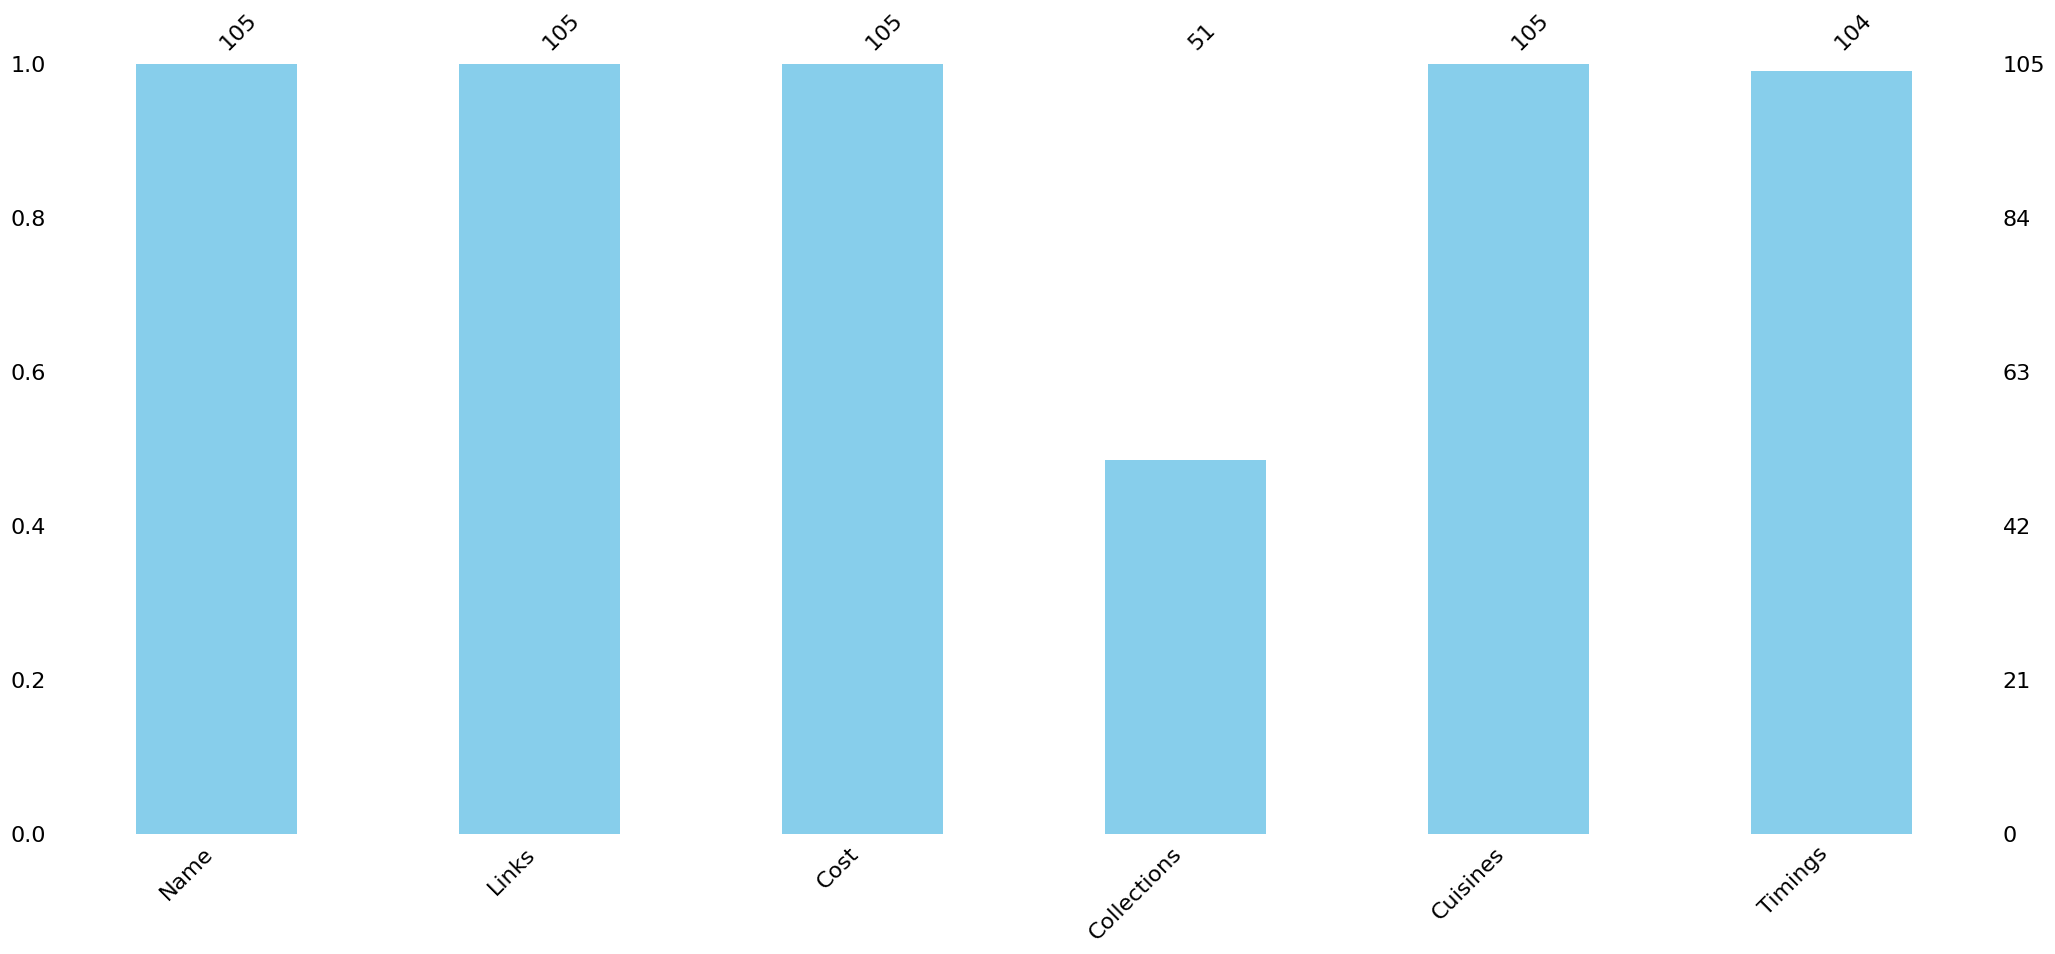

time: 934 ms (started: 2023-07-13 17:13:34 +00:00)


In [27]:
# missing value of zamato resturant name dataset
missing_func(df_restaurant)

In [28]:
# Check the total number of unique value of the resturent dataframe
df_restaurant['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

time: 4.39 ms (started: 2023-07-13 17:13:35 +00:00)


In [29]:
# Change the datatype of the Cost features from object to int
df_restaurant['Cost'] = df_restaurant['Cost'].str.replace(',','').astype(int)

time: 6.53 ms (started: 2023-07-13 17:13:35 +00:00)


In [30]:
# Check the Restaurant information
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB
time: 11.3 ms (started: 2023-07-13 17:13:35 +00:00)


In [31]:
# Top 5 economy restaurent
df_restaurant.sort_values('Cost')[['Name','Cost']].head()[::-1]

,Name,Cost
59,KS Bakers,200
101,Sweet Basket,200
54,Asian Meal Box,200
23,Amul,150
89,Mohammedia Shawarma,150


time: 8.41 ms (started: 2023-07-13 17:13:35 +00:00)


In [32]:
# Top 5 costly restaurent
df_restaurant.sort_values('Cost')[['Name','Cost']].tail()[::-1]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


time: 7.82 ms (started: 2023-07-13 17:13:35 +00:00)


In [33]:
# Create dataframe Restaurant name based on the price
df = df_restaurant.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index()
#getting Restaurant count with another dataframe
df1 = df_restaurant.groupby('Cost')['Name'].count()
#merging together
df2 = df.merge(df1,how = 'inner',on = 'Cost')
# Rename of the columns
df2 = df2.rename(columns = {'Name_x': 'Name of Restaurent','Name_y':'Total restaurent'})

time: 15.9 ms (started: 2023-07-13 17:13:35 +00:00)


In [34]:
# Maximum 5 hotel share same price
df2.sort_values('Total restaurent', ascending = False).head()

,Cost,Name of Restaurent,Total restaurent
7,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
9,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
11,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
18,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
16,1000,"[Hyper Local, Tiki Shack, Pista House, La La L...",6


time: 9.52 ms (started: 2023-07-13 17:13:35 +00:00)


In [35]:
# minimum 5 hotel share same price
df2.sort_values('Total restaurent', ascending = False).tail()

,Cost,Name of Restaurent,Total restaurent
14,850,[Dine O China],1
10,650,[Squeeze @ The Lime],1
3,300,[Shah Ghouse Spl Shawarma],1
2,250,[Wich Please],1
28,2800,[Collage - Hyatt Hyderabad Gachibowli],1


time: 13.4 ms (started: 2023-07-13 17:13:35 +00:00)


In [36]:
# spliting the cusines and storing in list
cuisine_value_list = df_restaurant.Cuisines.str.split(', ')
# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1
# Converting Dictionary to DataFrame
df_cuisine = pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurant'})
# top 5 cuisine
df_cuisine.sort_values('Number of Restaurant',ascending = False).head()

,Cuisine,Number of Restaurant
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


time: 18.2 ms (started: 2023-07-13 17:13:35 +00:00)


In [37]:
# spliting the cusines and storing in list
collection_value_list = df_restaurant.Collections.str.split(', ').dropna()
# storing all the cusines in a dict
collection_dict = {}
for collection_names in collection_value_list:
    for collection in collection_names:
        if (collection in collection_dict):
            collection_dict[collection]+=1
        else:
            collection_dict[collection]=1
# Converting Dictionary to DataFrame
df_collection = pd.DataFrame.from_dict([collection_dict]).transpose().reset_index().rename(columns={'index': 'Tags',0:'Number of Restaurant'})
# top 5 cuisine
df_collection.sort_values('Number of Restaurant',ascending = False).head()

,Tags,Number of Restaurant
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


time: 10.9 ms (started: 2023-07-13 17:13:35 +00:00)


#### **Review**

In [38]:
# Information of Review
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
time: 30.8 ms (started: 2023-07-13 17:13:35 +00:00)


In [39]:
# Columns of the Review
df_review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

time: 3.86 ms (started: 2023-07-13 17:13:35 +00:00)


In [40]:
# Top 5 review dataframe
df_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


time: 15.6 ms (started: 2023-07-13 17:13:35 +00:00)


In [41]:
# Extract the Year, Month and Date from time
df_review['Review_Year'] = pd.DatetimeIndex(df_review['Time']).year
df_review['Review_Month'] = pd.DatetimeIndex(df_review['Time']).month
df_review['Review_Day'] = pd.DatetimeIndex(df_review['Time']).day

time: 2.43 s (started: 2023-07-13 17:13:35 +00:00)


In [42]:
# Extract Total Review and Reviewer follower from Metadata
df_review['Reviewer_total_review'],df_review['Reviewer_followers']=df_review['Metadata'].str.split(',').str
# Extract Riviewer & Followers gave the total review in numeric value in the dataframe
df_review['Reviewer_total_review'] = pd.to_numeric(df_review['Reviewer_total_review'].str.split(' ').str[0])
df_review['Reviewer_followers'] = pd.to_numeric(df_review['Reviewer_followers'].str.split(' ').str[1])

time: 64.4 ms (started: 2023-07-13 17:13:37 +00:00)


In [43]:
# Unique value of rating
df_review['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

time: 5.67 ms (started: 2023-07-13 17:13:37 +00:00)


In [44]:
# In order for rating checking values
df_review['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

time: 8.19 ms (started: 2023-07-13 17:13:37 +00:00)


In [45]:
#since there is one rating as like converting it to 0 since no rating is 0 then to median
df_review.loc[df_review['Rating'] == 'Like'] = 0

time: 4.45 ms (started: 2023-07-13 17:13:37 +00:00)


In [46]:
#changing data type for rating in review data
df_review['Rating'] = df_review['Rating'].astype('float')

time: 6 ms (started: 2023-07-13 17:13:37 +00:00)


In [47]:
# Count the value of rating in review dataframe
df_review['Rating'].value_counts()

5.0    3832
4.0    2373
1.0    1735
3.0    1193
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
0.0       1
Name: Rating, dtype: int64

time: 6.07 ms (started: 2023-07-13 17:13:37 +00:00)


In [48]:
df_review

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Year,Review_Month,Review_Day,Reviewer_total_review,Reviewer_followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,2019.0,5.0,25.0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,2019.0,5.0,25.0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2019.0,5.0,24.0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,2019.0,5.0,24.0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,2019.0,5.0,24.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,2016.0,6.0,5.0,53.0,54.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2016.0,6.0,4.0,2.0,53.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,2016.0,6.0,3.0,65.0,423.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,2016.0,5.0,31.0,13.0,144.0


time: 32.1 ms (started: 2023-07-13 17:13:37 +00:00)


In [49]:
# Average rating and total reviewer of the restaurant
avg_restaurant_rating = df_review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).rename(columns={'Reviewer' : 'Total_review'})
avg_restaurant_rating

,Rating,Total_review
Restaurant,,
0,0.00,1
10 Downing Street,3.80,100
13 Dhaba,3.48,100
"3B's - Buddies, Bar & Barbecue",4.76,100
AB's - Absolute Barbecues,4.88,100
...,...,...
Urban Asia - Kitchen & Bar,3.65,100
Yum Yum Tree - The Arabian Food Court,3.56,100
Zega - Sheraton Hyderabad Hotel,4.45,100


time: 20.2 ms (started: 2023-07-13 17:13:37 +00:00)


In [50]:
# Check the total restaurant in review dataframe
print(df_review['Restaurant'].nunique())
print('\n')

101


time: 2.97 ms (started: 2023-07-13 17:13:37 +00:00)


In [51]:
# without review restaurant
restaurant_without_review = [i for i in df_restaurant['Name'].unique() if i not in df_review['Restaurant'].unique()]
restaurant_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

time: 50.5 ms (started: 2023-07-13 17:13:37 +00:00)


In [52]:
# Top 5 restaurent on the basis of the rating
avg_restaurant_rating.sort_values('Rating',ascending = False).head()

,Rating,Total_review
Restaurant,,
AB's - Absolute Barbecues,4.88,100
B-Dubs,4.81,100
"3B's - Buddies, Bar & Barbecue",4.76,100
Paradise,4.70,100
Flechazo,4.66,100


time: 11.1 ms (started: 2023-07-13 17:13:38 +00:00)


In [53]:
# Top 5 restaurent on the basis of the rating
avg_restaurant_rating.sort_values('Rating',ascending = False).tail()

,Rating,Total_review
Restaurant,,
Mathura Vilas,2.82,100
Pakwaan Grand,2.71,100
Asian Meal Box,2.58,100
Hotel Zara Hi-Fi,2.40,100
0,0.00,1


time: 9.83 ms (started: 2023-07-13 17:13:38 +00:00)


In [54]:
#Finding the most followed critic
most_followed_reviewer = df_review.groupby('Reviewer').agg({'Reviewer_total_review':'max',
      'Reviewer_followers':'max', 'Rating':'mean'[:5]}).reset_index().rename(columns = {'Rating':'Average Rating'}).sort_values('Reviewer_followers',ascending = False)

time: 27.9 ms (started: 2023-07-13 17:13:38 +00:00)


In [55]:
#Finding the top 5 most followed critic
most_followed_reviewer.head()

,Reviewer,Reviewer_total_review,Reviewer_followers,Average Rating
5464,Satwinder Singh,186.0,13410.0,3.666667
1702,Eat_vth_me,60.0,13320.0,5.000000
5236,Samar Sardar,8.0,11329.0,3.500000
1788,Foodies Hyderabad,31.0,9494.0,4.500000
6230,Srinivas,34.0,7628.0,3.714286


time: 9.66 ms (started: 2023-07-13 17:13:38 +00:00)


#### **Null Value**

##### **Treatment of Null Value of Restaurant Dataset**

,missing_value,% of missing values,Data_Type
Name,0,0.000000,object
Links,0,0.000000,object
Cost,0,0.000000,int64
Collections,54,51.428571,object
Cuisines,0,0.000000,object
Timings,1,0.952381,object


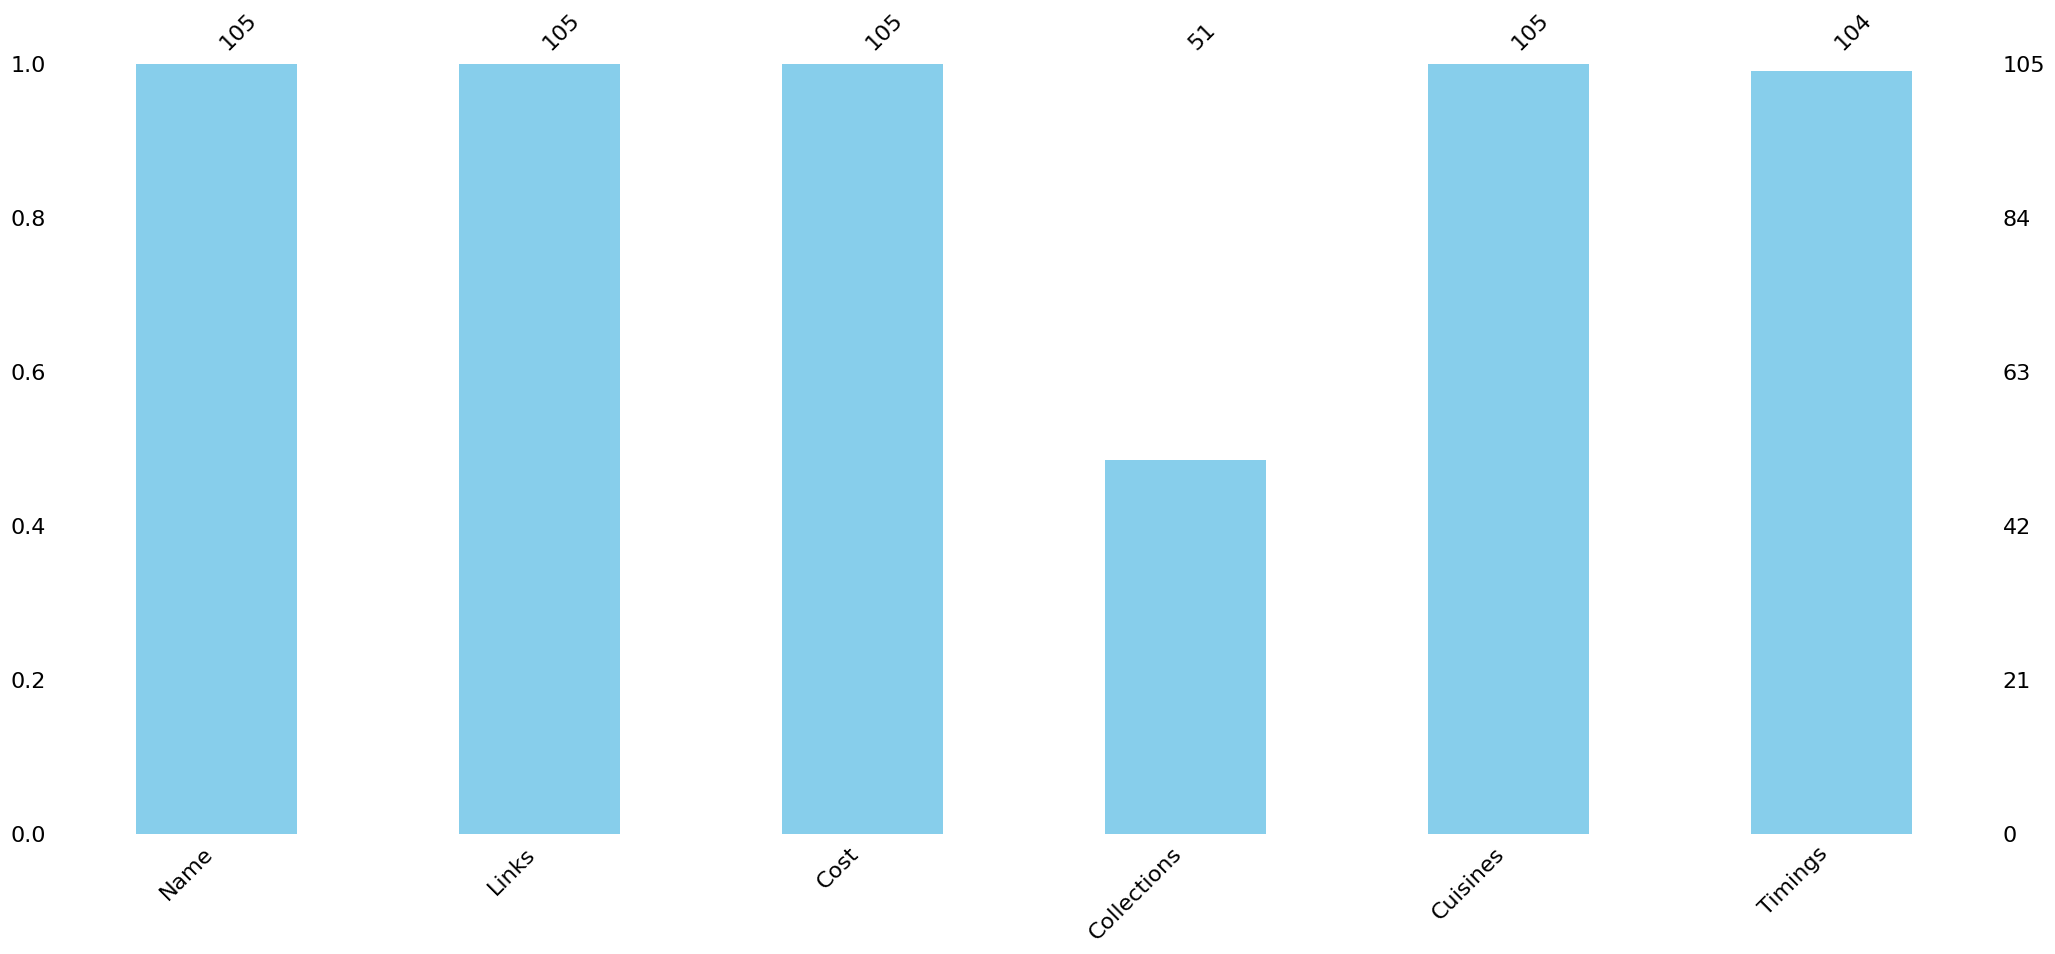

time: 881 ms (started: 2023-07-13 17:13:38 +00:00)


In [56]:
# Check the missing Value in Restaurant
missing_func(df_restaurant)

Here we can see that in collection feature having 51.42% of missing value, then it is best for drop the null value in the restaurant dataset.

In [57]:
# Drop null value in the resturant dataset
df_restaurant.drop('Collections',axis = 1,inplace= True)

time: 1.7 ms (started: 2023-07-13 17:13:39 +00:00)


In [58]:
# Again Check the Null Value
df_restaurant.isna().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     1
dtype: int64

time: 6.86 ms (started: 2023-07-13 17:13:39 +00:00)


Here we wiil say that Timing feature having only one null value so it will fill it null value with mode value.

In [59]:
#filling null value in timings column
df_restaurant['Timings'].fillna(df_restaurant['Timings'].mode()[0], inplace = True)

time: 1.62 ms (started: 2023-07-13 17:13:39 +00:00)


In [60]:
# Again Check the Null Value
df_restaurant.isna().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

time: 6.86 ms (started: 2023-07-13 17:13:39 +00:00)


So it is claear that there is no null value in the restaurant dataset.

In [61]:
# Check the duplicate value of the restaurant dataset
print(df_restaurant.duplicated().sum())
print('\n')

0


time: 2.7 ms (started: 2023-07-13 17:13:39 +00:00)


So it is claear that there is no duplicate value in the restaurant dataset.

##### **Treatment of Null Value of Review Dataset**

In [62]:
# Information of Review Dataset
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant             10000 non-null  object 
 1   Reviewer               9962 non-null   object 
 2   Review                 9955 non-null   object 
 3   Rating                 9962 non-null   float64
 4   Metadata               9962 non-null   object 
 5   Time                   9962 non-null   object 
 6   Pictures               10000 non-null  int64  
 7   Review_Year            9962 non-null   float64
 8   Review_Month           9962 non-null   float64
 9   Review_Day             9962 non-null   float64
 10  Reviewer_total_review  9962 non-null   float64
 11  Reviewer_followers     8384 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 937.6+ KB
time: 26.9 ms (started: 2023-07-13 17:13:39 +00:00)


,missing_value,% of missing values,Data_Type
Restaurant,0,0.00,object
Reviewer,38,0.38,object
Review,45,0.45,object
Rating,38,0.38,float64
Metadata,38,0.38,object
Time,38,0.38,object
Pictures,0,0.00,int64
Review_Year,38,0.38,float64
Review_Month,38,0.38,float64
Review_Day,38,0.38,float64


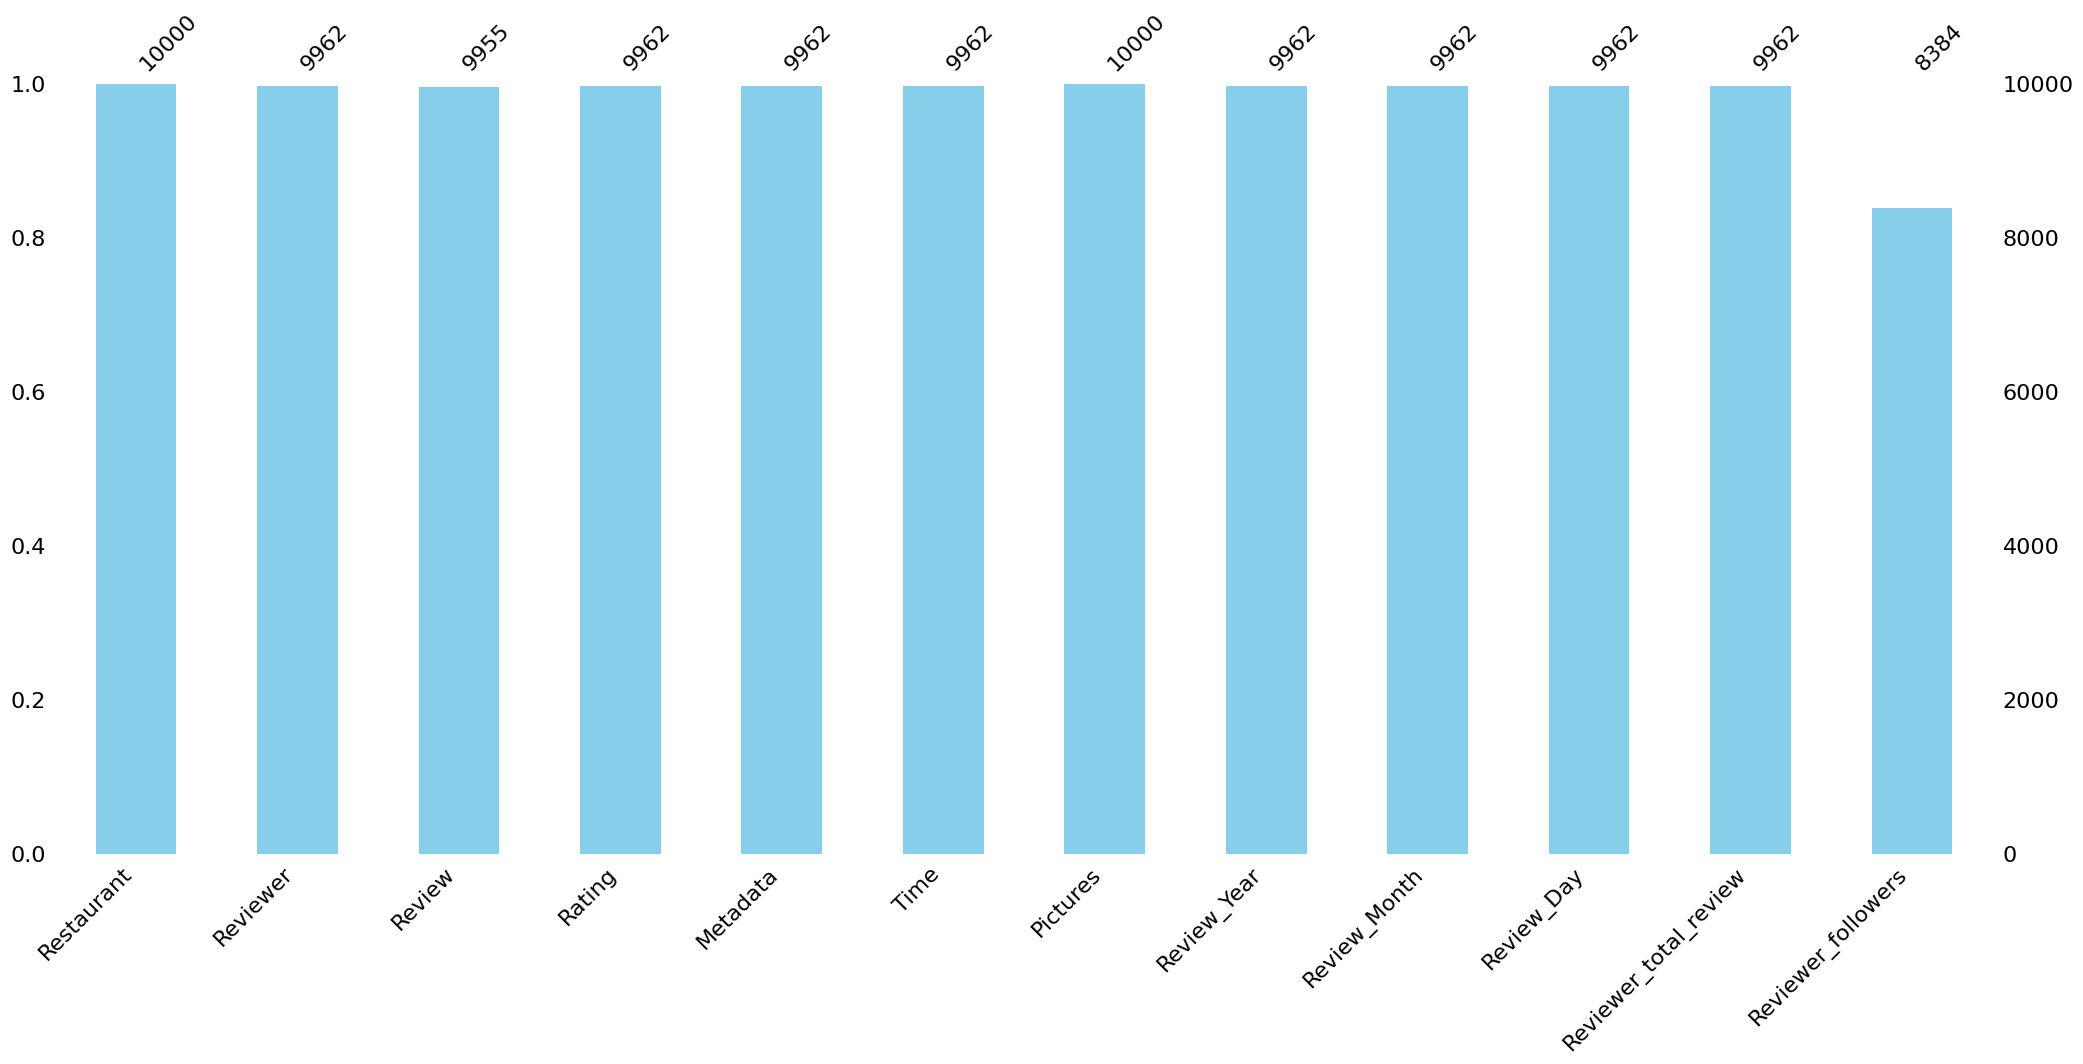

time: 1.29 s (started: 2023-07-13 17:13:39 +00:00)


In [63]:
# Check the missing value of the review dataset
missing_func(df_review)

Here we can see that there are some missing value in the following feature:
1. Reviewer
2.  Review
3. Rating
4. Metadata
5. Time
6. Review_Year
7. Review_Month
8. Review_Day
9. Review_total_review
10. Reviewer_followers



We have to fill the null values of CompetitionDistance, there are **four** options:
1. **Zero(0) :** Not effective as the corresponding values for CompetitionSinceMonth and CompetitionSinceYear are not zero.
2. **Mean :** Replacing null values with mean will create blunders as it contains outliers and mean is influenced with outliers.
3. **Median :** To get good results replacing with median can be a better choice.
4. **Mode :** Mode can also help to fill the null values in our case.

Since, we have two options(Mode and Median) we are going with the mode for float type of the feature.

In [64]:
# Treatment of missing value of the float type data with mode value
null_list = [ i for i in df_review.columns if df_review[i].dtypes == 'float64']
n = null_list.index('Reviewer_followers')
null_list.pop(n)
null_list
for i in null_list:
  df_review[i].fillna(df_review[i].mode()[0],inplace = True)

time: 8.11 ms (started: 2023-07-13 17:13:40 +00:00)


In [65]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
df_review = df_review.dropna(subset=['Reviewer','Reviewer_total_review'])

time: 12.8 ms (started: 2023-07-13 17:13:40 +00:00)


In [66]:
#filling null values in review and reviewer follower column
df_review = df_review.fillna({"Review": "No Review", "Reviewer_followers": 0})

time: 8.17 ms (started: 2023-07-13 17:13:40 +00:00)


,missing_value,% of missing values,Data_Type
Restaurant,0,0.0,object
Reviewer,0,0.0,object
Review,0,0.0,object
Rating,0,0.0,float64
Metadata,0,0.0,object
Time,0,0.0,object
Pictures,0,0.0,int64
Review_Year,0,0.0,float64
Review_Month,0,0.0,float64
Review_Day,0,0.0,float64


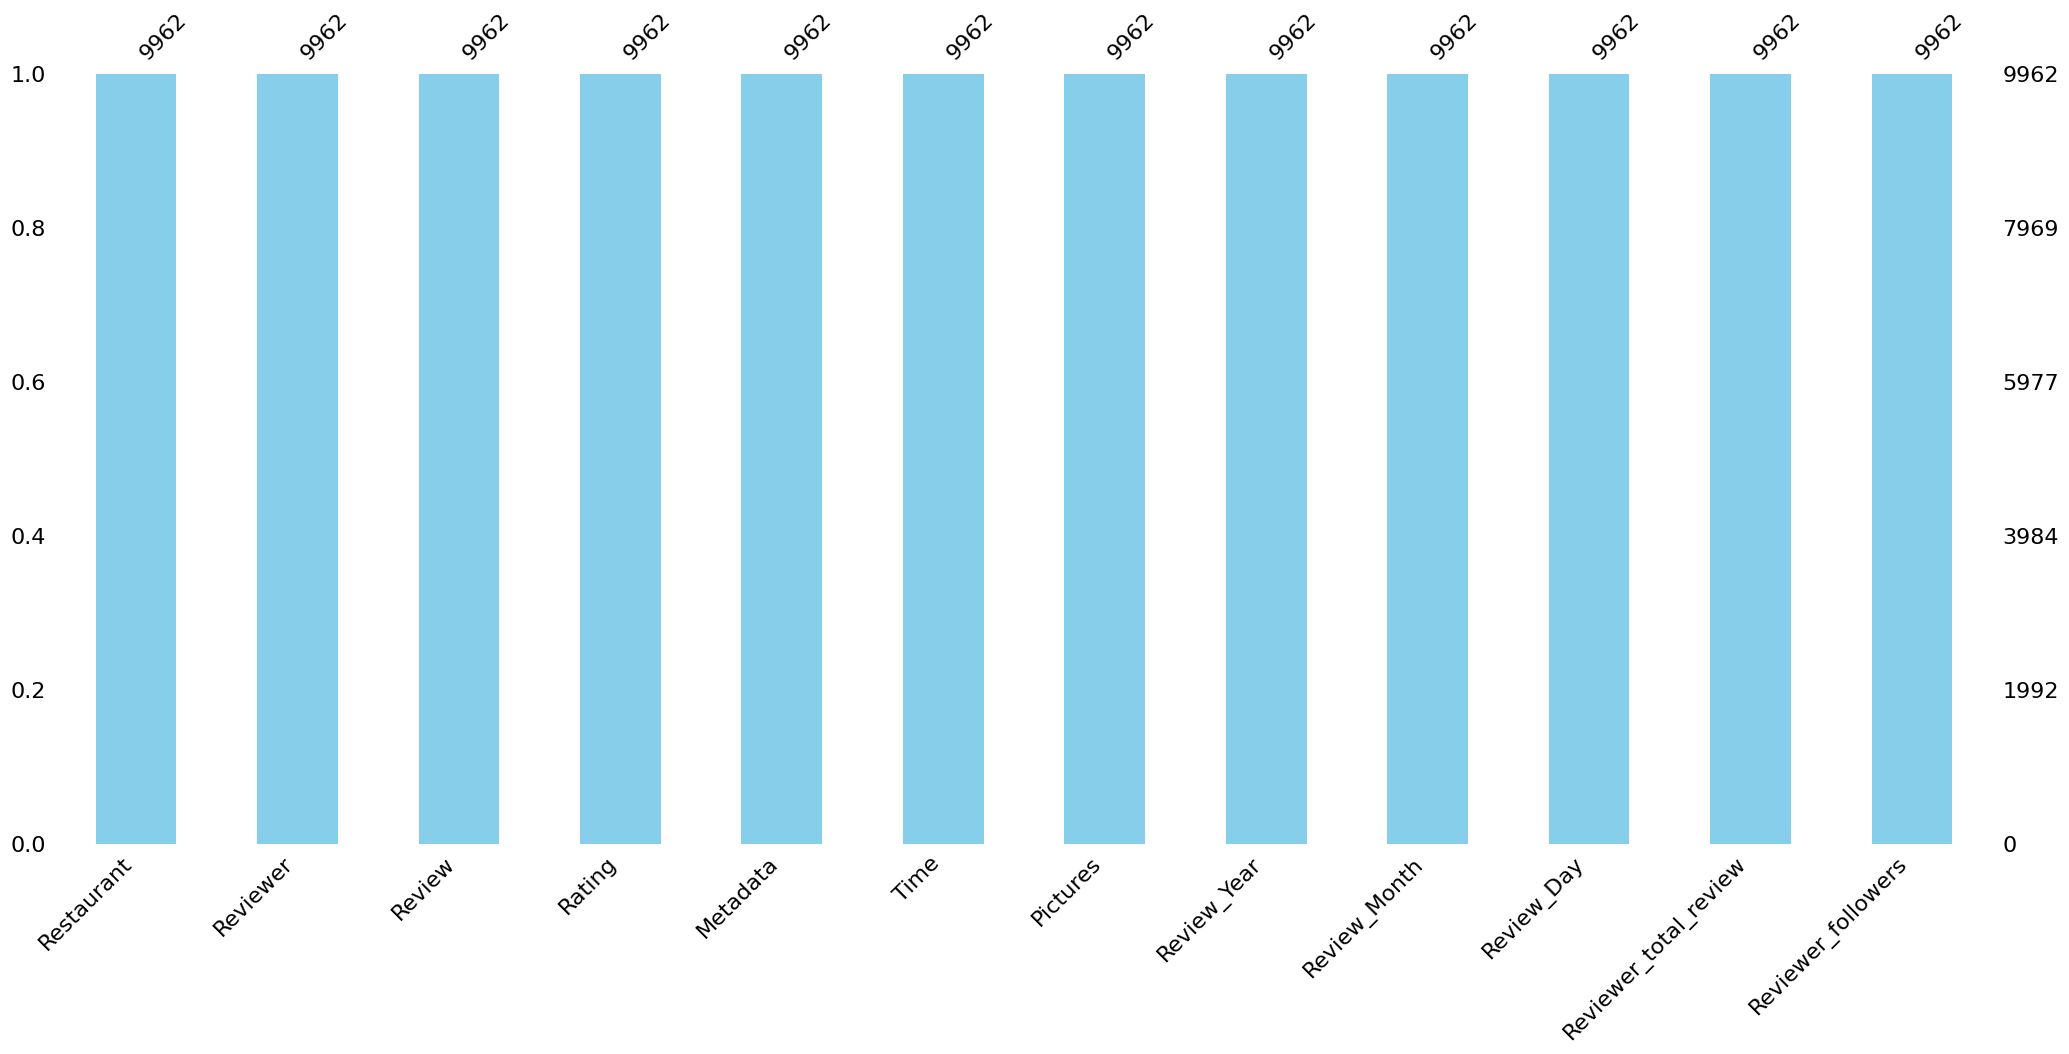

time: 1.31 s (started: 2023-07-13 17:13:40 +00:00)


In [67]:
missing_func(df_review)

In [68]:
# Check tje duplicate value in the review dataset
df_review.duplicated().sum()

0

time: 19.4 ms (started: 2023-07-13 17:13:41 +00:00)


#### **Merge Dataset**

In [69]:
# In Restaurant dataset change the Name as Restaurant
df_restaurant['Restaurant'] = df_restaurant['Name']
df_restaurant = df_restaurant.drop(columns = 'Name',axis = 1)

time: 3.9 ms (started: 2023-07-13 17:13:41 +00:00)


In [70]:
# checking shape of dataset using left join
df_left= pd.merge(df_restaurant, df_review, on='Restaurant', how= 'left')
print(df_left.shape)
print(f'Total number of null values obtained from left join: {df_left.isna().sum().sum()}')

# checking shape of dataset using right join
df_right= pd.merge(df_restaurant, df_review, on='Restaurant', how= 'right')
print(df_right.shape)
print(f'Total number of null values obtained from right join: {df_right.isna().sum().sum()}')


# checking shape of dataset using inner join
df_inner= pd.merge(df_restaurant, df_review, on='Restaurant', how= 'inner')
print(df_inner.shape)
print(f'Total number of null values obtained from inner join: {df_inner.isna().sum().sum()}')

# checking shape of dataset using outer join
df_outer= pd.merge(df_restaurant, df_review, on='Restaurant', how= 'outer')
print(df_outer.shape)
print(f'Total number of null values obtained from outer join: {df_outer.isna().sum().sum()}')

(9966, 16)
Total number of null values obtained from left join: 55
(9962, 16)
Total number of null values obtained from right join: 4
(9961, 16)
Total number of null values obtained from inner join: 0
(9967, 16)
Total number of null values obtained from outer join: 59
time: 109 ms (started: 2023-07-13 17:13:41 +00:00)


Since, we are obtaining the same shape and 0 null values in the inner joins therefore we can use any of the join and it won't affact the results.

We are following the inner join for our further analysis.

So we have to proceed with inner join beacuse there have no null value present in the dataset.

In [71]:
# Shape of the merged dataset
df_inner.shape

(9961, 16)

time: 5.65 ms (started: 2023-07-13 17:13:42 +00:00)


In [72]:
# Information of the merged dataset
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9961 entries, 0 to 9960
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Links                  9961 non-null   object 
 1   Cost                   9961 non-null   int64  
 2   Cuisines               9961 non-null   object 
 3   Timings                9961 non-null   object 
 4   Restaurant             9961 non-null   object 
 5   Reviewer               9961 non-null   object 
 6   Review                 9961 non-null   object 
 7   Rating                 9961 non-null   float64
 8   Metadata               9961 non-null   object 
 9   Time                   9961 non-null   object 
 10  Pictures               9961 non-null   int64  
 11  Review_Year            9961 non-null   float64
 12  Review_Month           9961 non-null   float64
 13  Review_Day             9961 non-null   float64
 14  Reviewer_total_review  9961 non-null   float64
 15  Revi

In [73]:
# Description of the merged dataset
df_inner.describe(include= 'all')

,Links,Cost,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Year,Review_Month,Review_Day,Reviewer_total_review,Reviewer_followers
count,9961,9961.000000,9961,9961,9961,9961,9961,9961.000000,9961,9961,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000
unique,100,NaN,89,74,100,7446,9364,NaN,2477,9781,NaN,NaN,NaN,NaN,NaN,NaN
top,https://www.zomato.com/hyderabad/beyond-flavou...,NaN,"North Indian, Chinese",11 AM to 11 PM,Beyond Flavours,Ankita,good,NaN,1 Review,7/29/2018 20:34,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,400,600,100,13,237,NaN,919,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,871.584178,NaN,NaN,NaN,NaN,NaN,3.601044,NaN,NaN,0.751431,2018.452063,6.017970,16.107218,23.992069,163.008433
std,NaN,503.425455,NaN,NaN,NaN,NaN,NaN,1.483461,NaN,NaN,2.574991,0.562496,3.159606,8.781835,50.617425,619.979721
min,NaN,150.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,500.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,0.000000,2018.000000,4.000000,9.000000,1.000000,1.000000
50%,NaN,700.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000,2018.000000,5.000000,16.000000,4.000000,7.000000
75%,NaN,1200.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,0.000000,2019.000000,8.000000,24.000000,22.000000,63.000000


time: 231 ms (started: 2023-07-13 17:13:42 +00:00)


In [74]:
# Top 5 rows of the merged dataset
df_inner.head()

,Links,Cost,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Year,Review_Month,Review_Day,Reviewer_total_review,Reviewer_followers
0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,2019.0,5.0,25.0,1.0,2.0
1,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,2019.0,5.0,25.0,3.0,2.0
2,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2019.0,5.0,24.0,2.0,3.0
3,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,2019.0,5.0,24.0,1.0,1.0
4,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,2019.0,5.0,24.0,3.0,2.0


time: 17.6 ms (started: 2023-07-13 17:13:42 +00:00)


In [75]:
# Bootom 5 rows of the merged dataset
df_inner.tail()

,Links,Cost,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Year,Review_Month,Review_Day,Reviewer_total_review,Reviewer_followers
9956,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,2016.0,6.0,5.0,53.0,54.0
9957,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2016.0,6.0,4.0,2.0,53.0
9958,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,2016.0,6.0,3.0,65.0,423.0
9959,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,2016.0,5.0,31.0,13.0,144.0
9960,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6,2016.0,5.0,31.0,472.0,1302.0


time: 36.5 ms (started: 2023-07-13 17:13:42 +00:00)


In [76]:
# Check the duplicate value in the dataset
print(df_inner.duplicated().sum())
print()

0

time: 30.9 ms (started: 2023-07-13 17:13:42 +00:00)


,missing_value,% of missing values,Data_Type
Links,0,0.0,object
Cost,0,0.0,int64
Cuisines,0,0.0,object
Timings,0,0.0,object
Restaurant,0,0.0,object
Reviewer,0,0.0,object
Review,0,0.0,object
Rating,0,0.0,float64
Metadata,0,0.0,object
Time,0,0.0,object


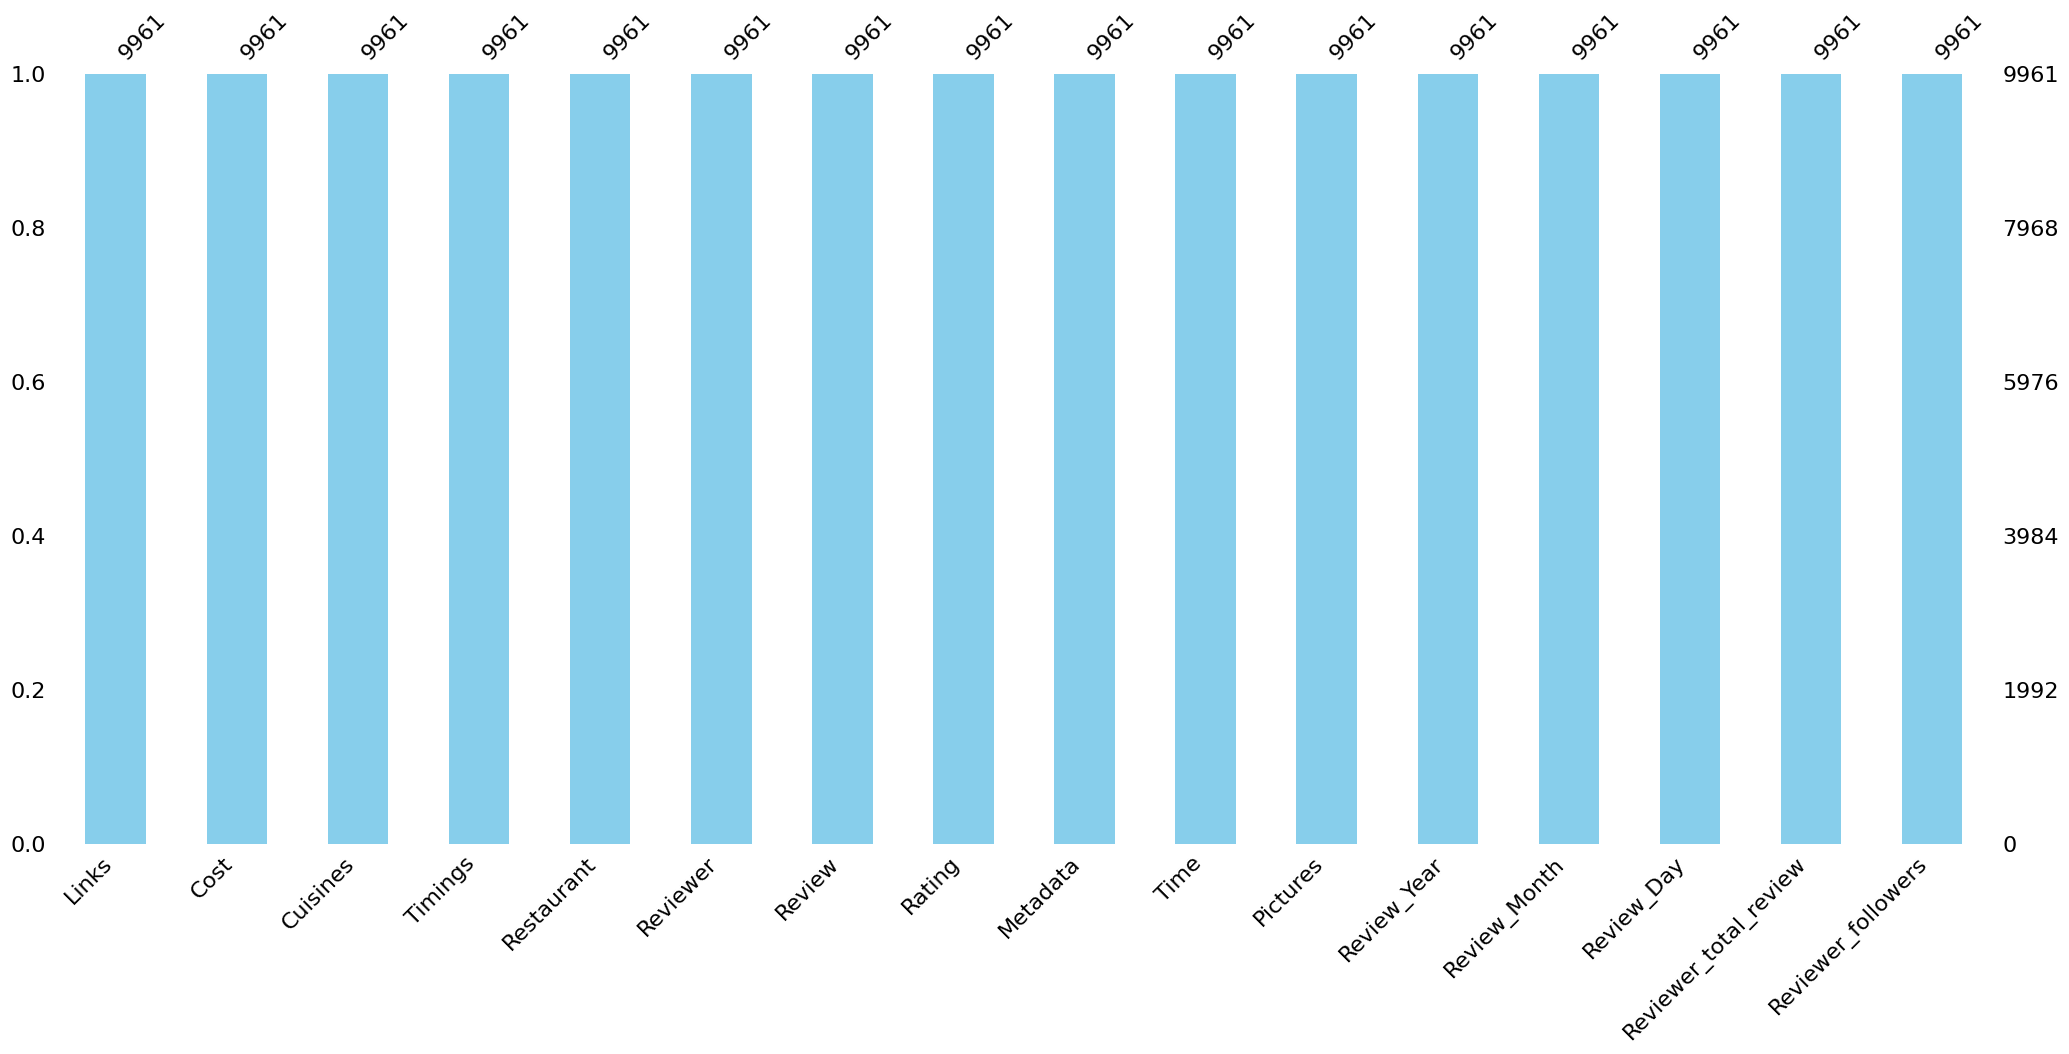

time: 2.08 s (started: 2023-07-13 17:13:42 +00:00)


In [77]:
# Check the null value and plot the missing number
missing_func(df_inner)

We have to decide the two type of the columns list one list have contain the object datatype of the feature and other contain the numerical datatype feature.

In [78]:
# Create list of columns
object_list = [i for i in df_inner.columns if df_inner[i].dtypes == 'object']
numerical_list = [i for i in df_inner.columns if i not in object_list]
print(object_list)
print(numerical_list)

['Links', 'Cuisines', 'Timings', 'Restaurant', 'Reviewer', 'Review', 'Metadata', 'Time']
['Cost', 'Rating', 'Pictures', 'Review_Year', 'Review_Month', 'Review_Day', 'Reviewer_total_review', 'Reviewer_followers']
time: 4.97 ms (started: 2023-07-13 17:13:44 +00:00)


In [79]:
# Check the total number of different type of the data present in the features
for i in df_inner.columns:
  print(f'Total number of unique value in {i} is {df_inner[i].nunique()}.')

Total number of unique value in Links is 100.
Total number of unique value in Cost is 28.
Total number of unique value in Cuisines is 89.
Total number of unique value in Timings is 74.
Total number of unique value in Restaurant is 100.
Total number of unique value in Reviewer is 7446.
Total number of unique value in Review is 9364.
Total number of unique value in Rating is 9.
Total number of unique value in Metadata is 2477.
Total number of unique value in Time is 9781.
Total number of unique value in Pictures is 36.
Total number of unique value in Review_Year is 4.
Total number of unique value in Review_Month is 12.
Total number of unique value in Review_Day is 31.
Total number of unique value in Reviewer_total_review is 234.
Total number of unique value in Reviewer_followers is 751.
time: 38.2 ms (started: 2023-07-13 17:13:44 +00:00)


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In order to visualize each chart properly we will do data visualization in a structured way following ' UBM ' rule:

*   Univariate Analysis
*   Bivariate Analysis

*   Multivariate Analysis

### **Univariate Analysis**

#### Chart - 1

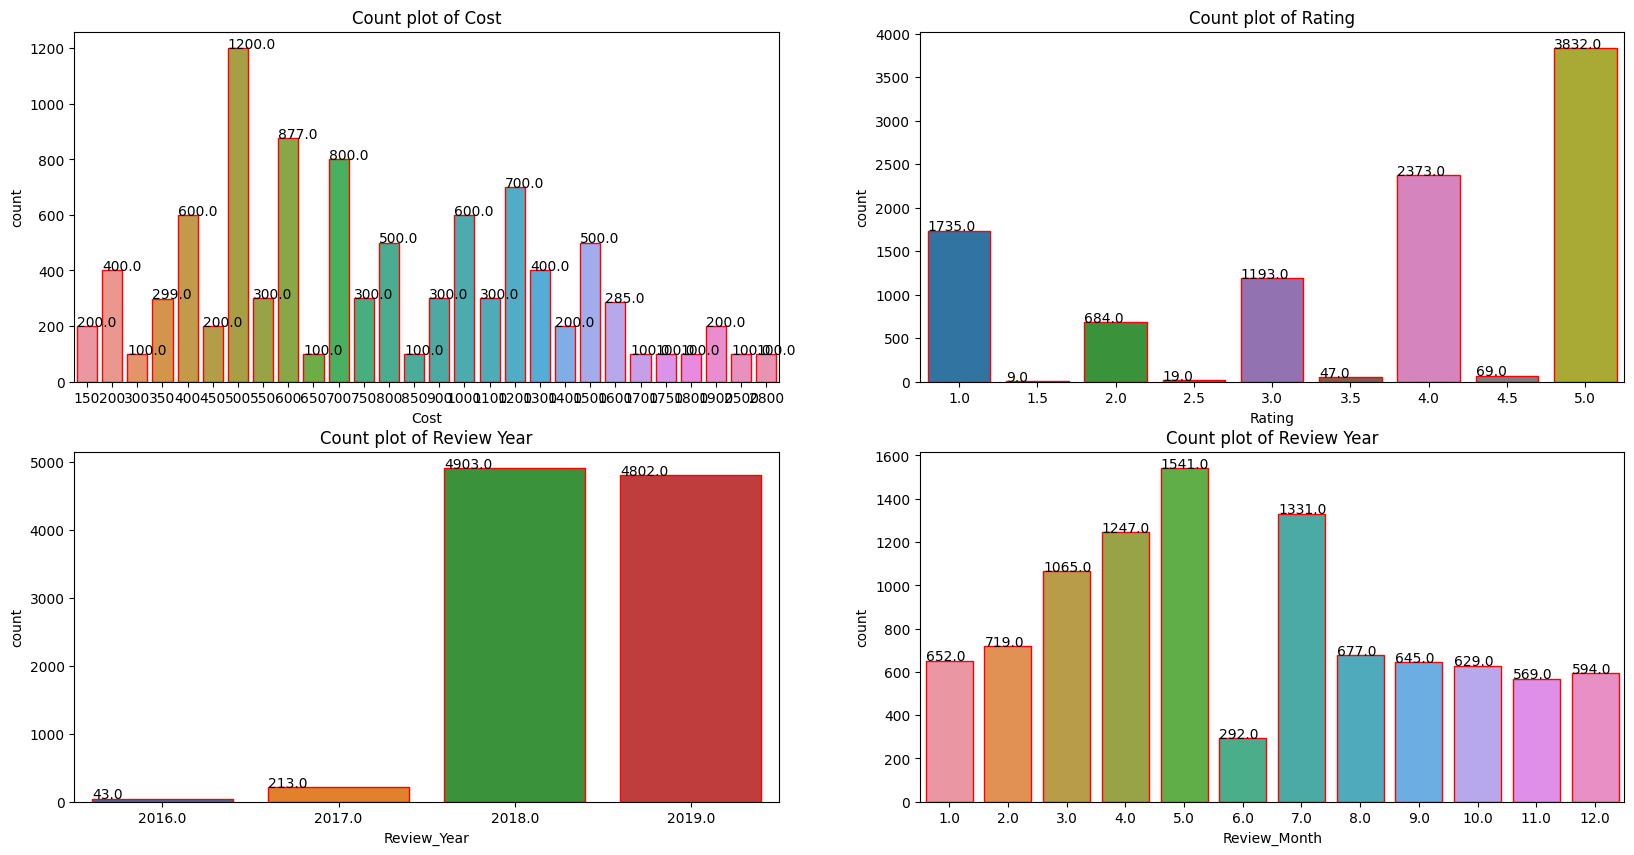

time: 1.76 s (started: 2023-07-13 17:47:16 +00:00)


In [105]:
# Chart - 1 visualization code
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
ax = sns.countplot(x = 'Cost', data = df_inner,edgecolor = 'red')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.title ('Count plot of Cost')

plt.subplot(2,2,2)
ax = sns.countplot(x = 'Rating', data = df_inner,edgecolor = 'red')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.title ('Count plot of Rating')

plt.subplot(2,2,3)
ax = sns.countplot(x = 'Review_Year', data = df_inner,edgecolor = 'red')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.title ('Count plot of Review Year')

plt.subplot(2,2,4)
ax = sns.countplot(x = 'Review_Month', data = df_inner,edgecolor = 'red')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.title ('Count plot of Review Year')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

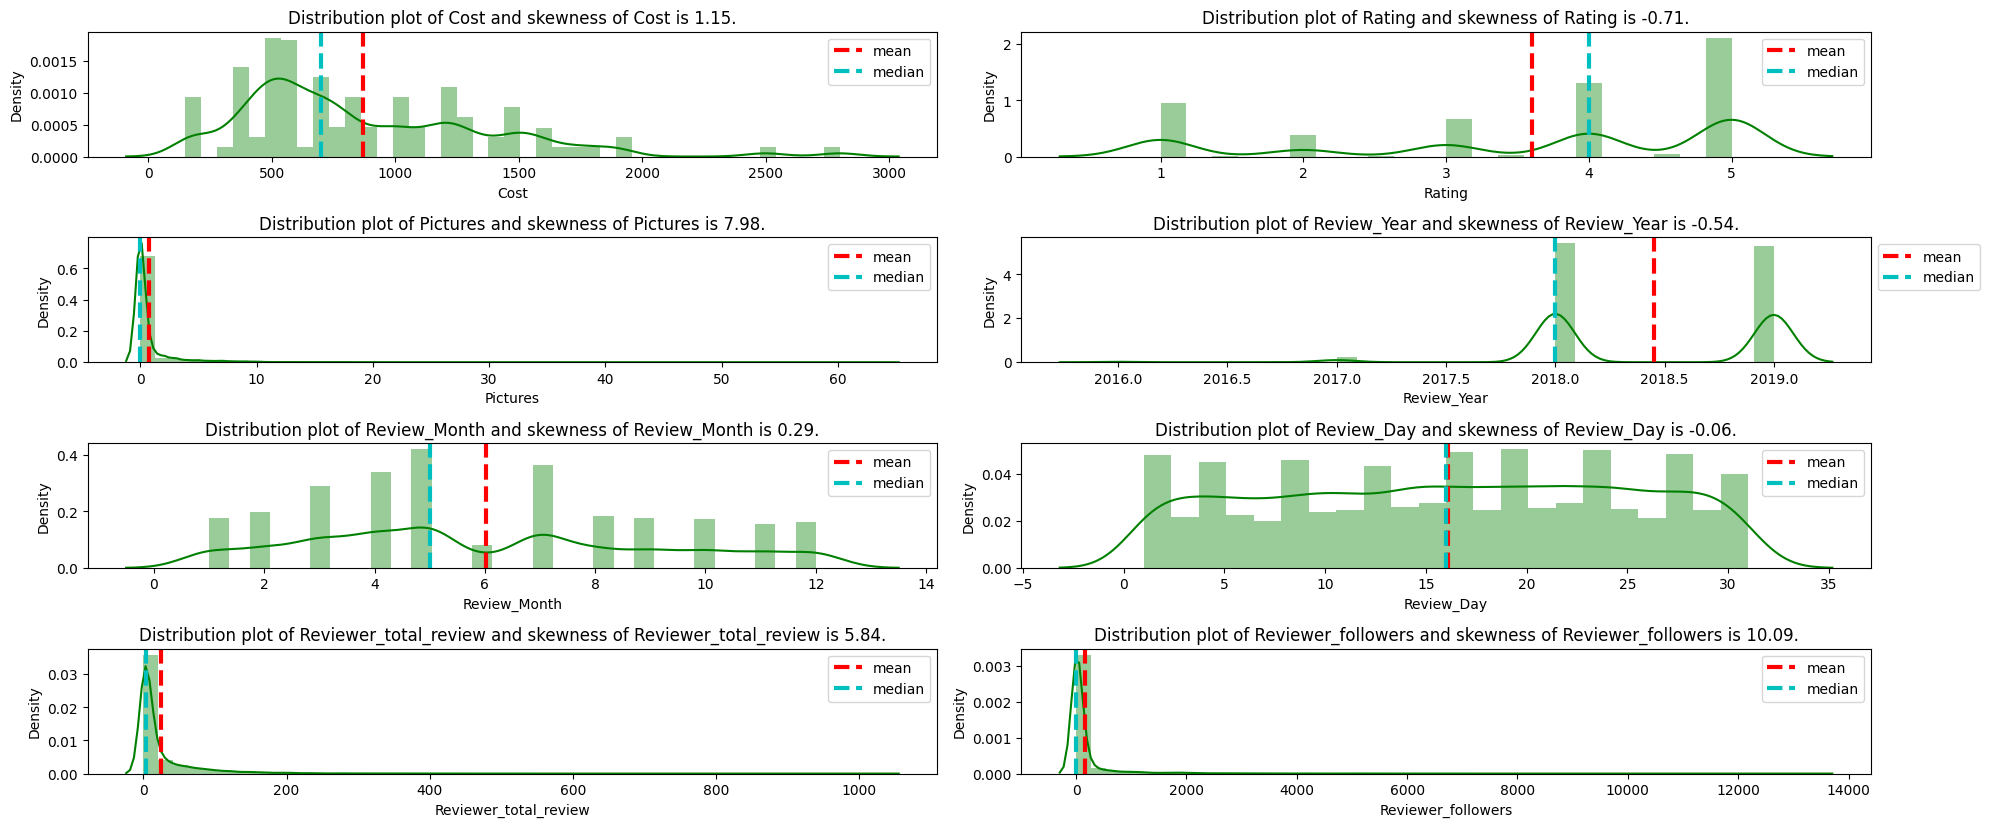

time: 6.25 s (started: 2023-07-13 18:22:09 +00:00)


In [121]:
# Chart - 2 visualization code
plt.figure(figsize= (20,10))
for n,i in enumerate(numerical_list):
  plt.subplot(int(len(numerical_list)/2 + 1),2,n+1)
  plot = sns.distplot(df_inner[i],color = 'g').set(title= f'Distribution plot of {i} and skewness of {i} is {round(df_inner[i].skew(),2)}.')
  feature = df_inner[i]
  plt.axvline(feature.mean(), color='r', linestyle='dashed', linewidth=3,label= 'mean');  #red
  plt.axvline(feature.median(), color='c', linestyle='dashed', linewidth=3,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1))
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

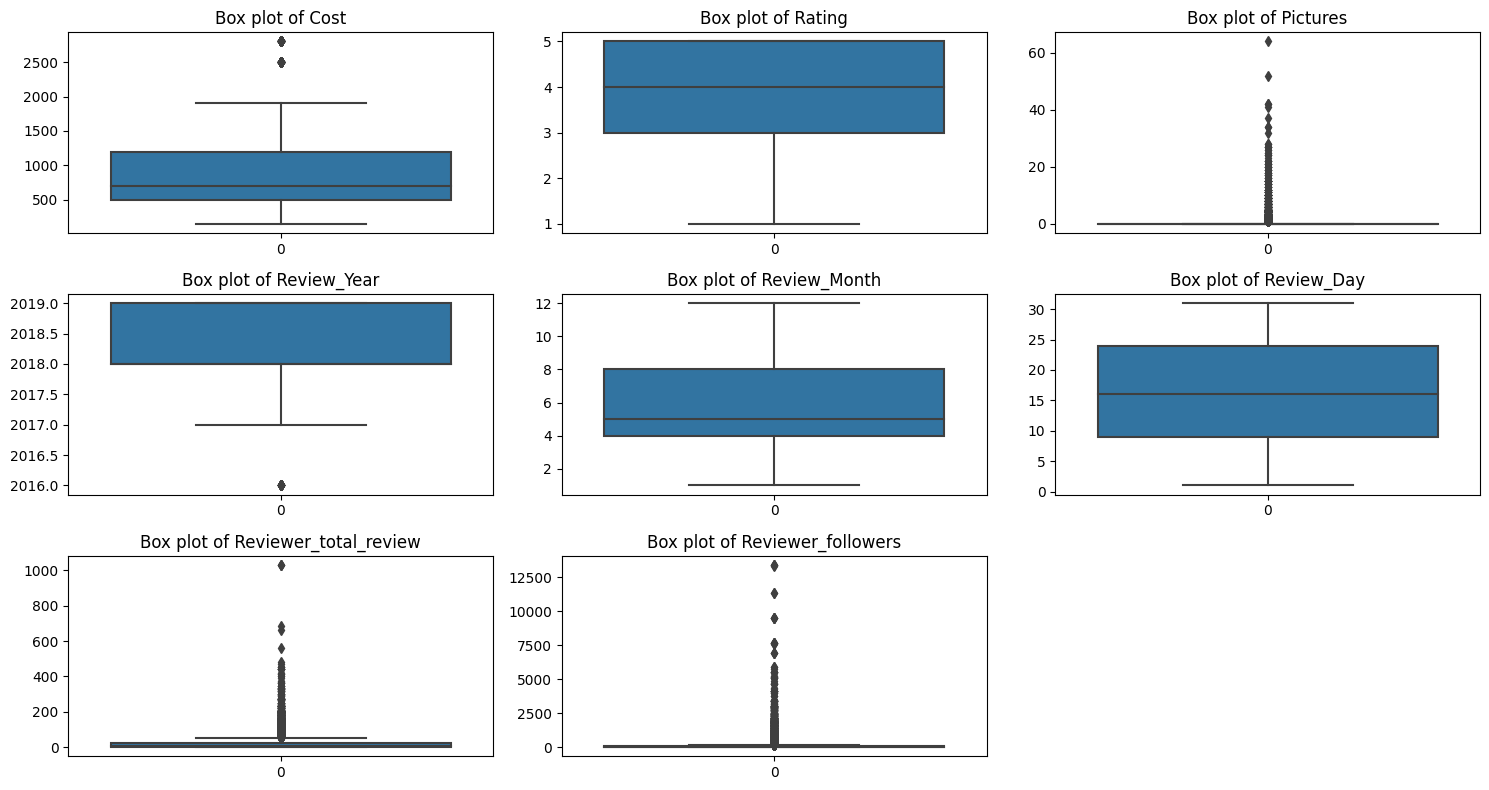

time: 2.48 s (started: 2023-07-13 18:43:40 +00:00)


In [122]:
# Chart - 3 visualization code
plt.figure(figsize= (15,8))
for num,col in enumerate(numerical_list):
  plt.subplot(int(len(numerical_list)/3 + 1),3,num+1)
  sns.boxplot(df_inner[col]).set(title= f'Box plot of {col}')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

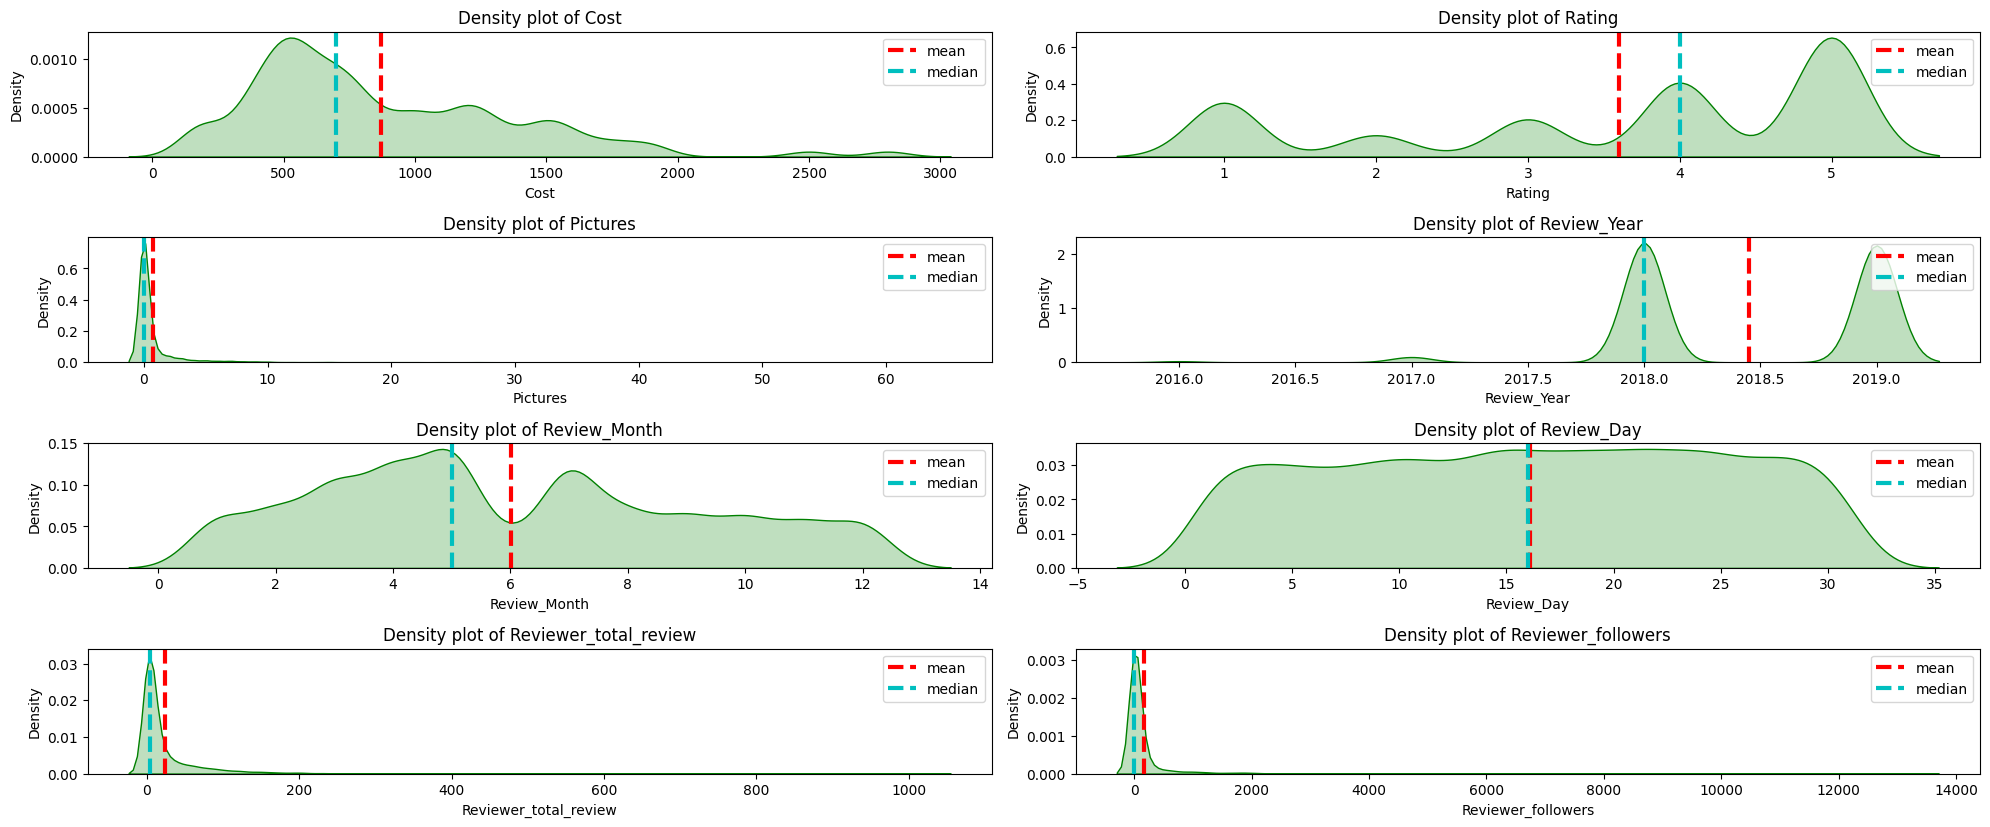

time: 6.46 s (started: 2023-07-13 19:36:19 +00:00)


In [128]:
# Chart - 4 visualization code
plt.figure(figsize= (20,10))
for n,i in enumerate(numerical_list):
  plt.subplot(int(len(numerical_list)/2 + 1),2,n+1)
  plot = sns.kdeplot(df_inner[i],color = 'g',shade = True).set(title= f'Density plot of {i}')
  feature = df_inner[i]
  plt.axvline(feature.mean(), color='r', linestyle='dashed', linewidth=3,label= 'mean');  #red
  plt.axvline(feature.median(), color='c', linestyle='dashed', linewidth=3,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1))
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

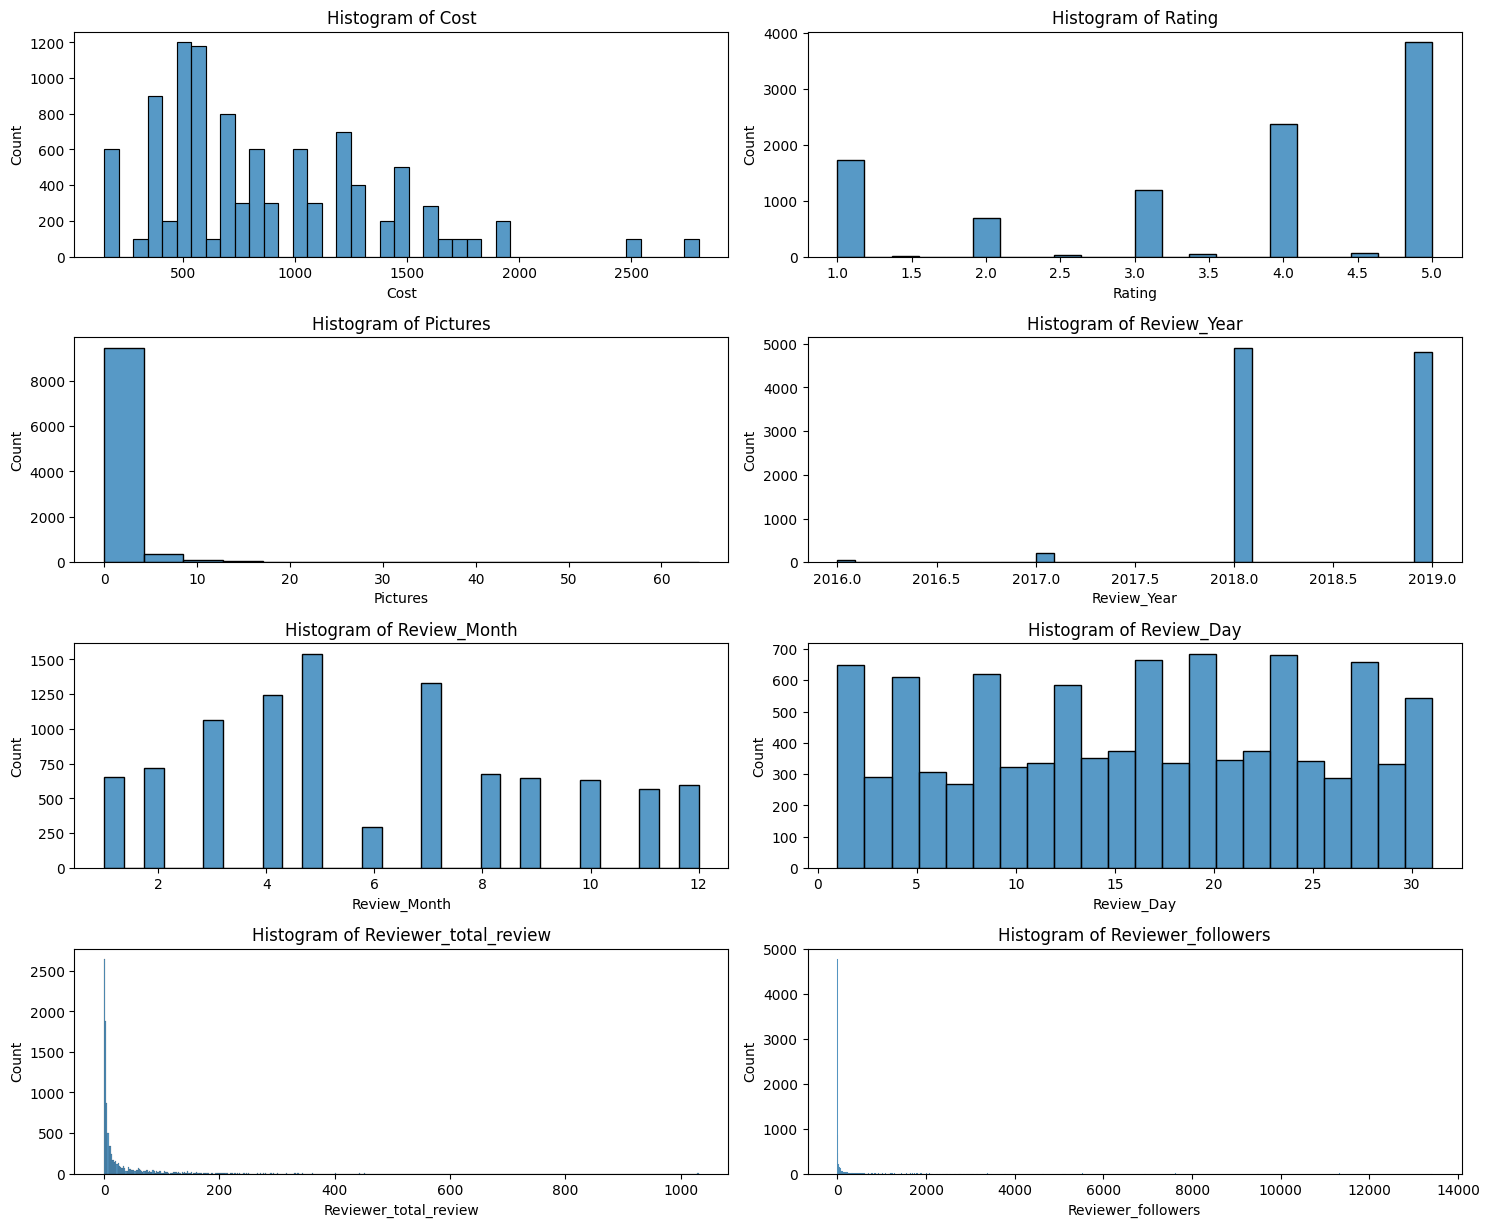

time: 7.46 s (started: 2023-07-13 19:43:21 +00:00)


In [135]:
# Chart - 5 visualization code
plt.figure(figsize= (15,15))
for num,col in enumerate(numerical_list):
  plt.subplot(int(len(numerical_list)/2 + 1),2,num + 1)
  sns.histplot(df_inner[col]).set(title= f'Histogram of {col}')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

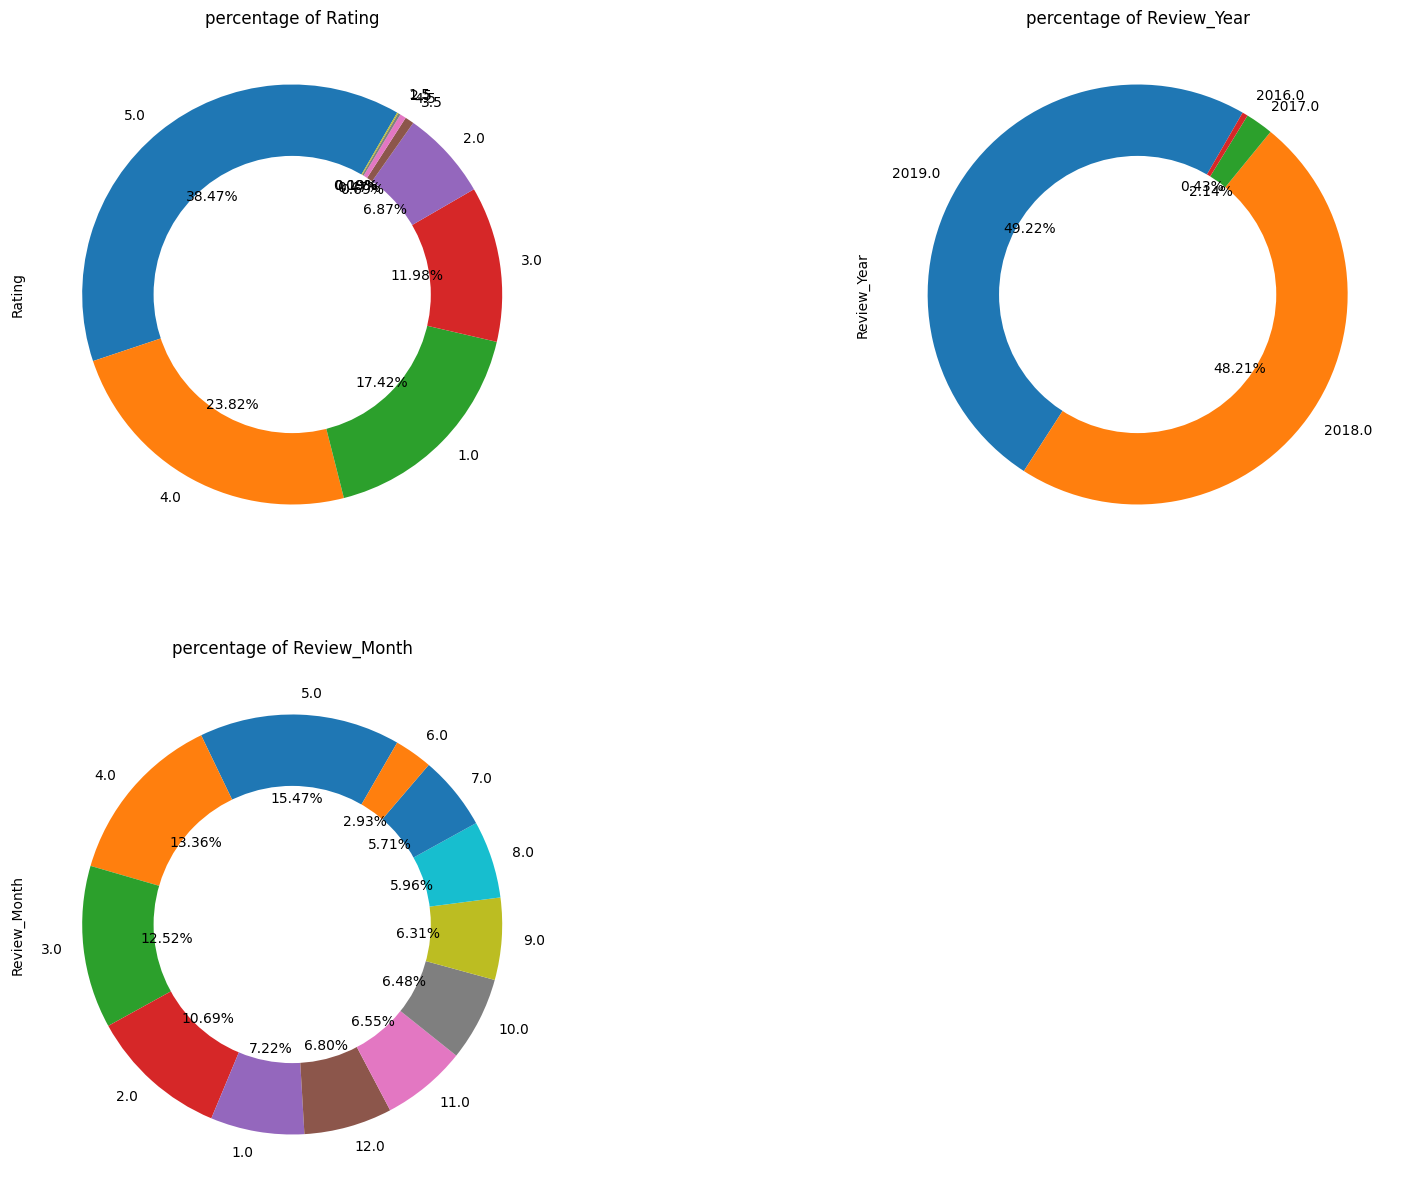

time: 587 ms (started: 2023-07-13 19:57:43 +00:00)


In [146]:
# Chart - 6 visualization code
col = ['Rating','Review_Year','Review_Month']
plt.figure(figsize = (20,15))
for n,i in enumerate(col):
  plt.subplot(2,2,n+1)
  df_inner[i].value_counts().plot(kind='pie',
                               autopct="%1.2f%%",
                               startangle= 60,
                               shadow=False,
                               labels=df_inner[i].unique(),
                              # colors=['yellow','red'],
                               explode=[0 for i in range(len(df_inner[i].unique()))],
                               title = f'percentage of {i}'
                              )
  centre_circle = plt.Circle((0, 0), 0.66, fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.tight_layout

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap for Zamato')

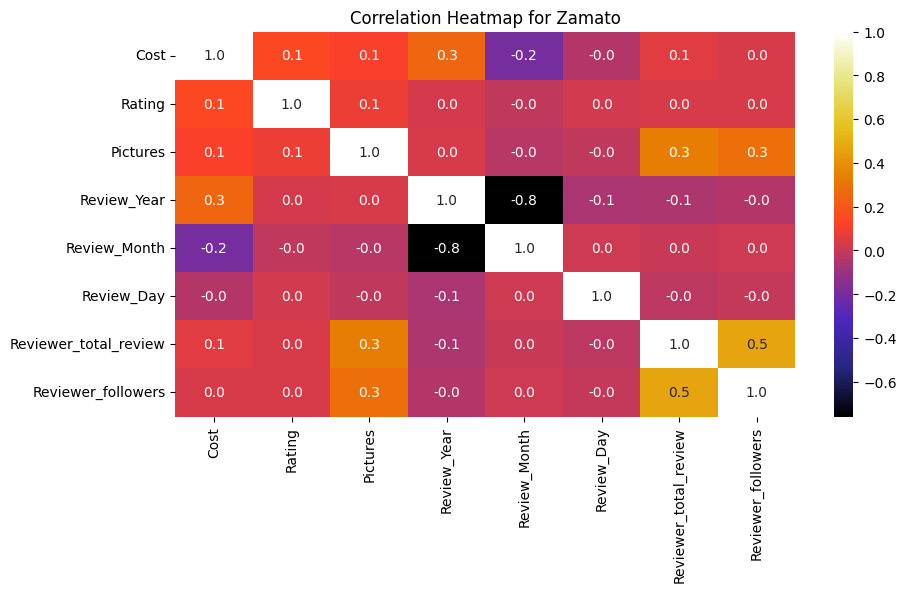

time: 616 ms (started: 2023-07-13 17:59:03 +00:00)


In [108]:
# Correlation Heatmap visualization code
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_inner.corr(),annot = True,fmt='0.1f',annot_kws={'size':10},vmax =1,cmap= plt.cm.CMRmap)
plt.title('Correlation Heatmap for Zamato')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

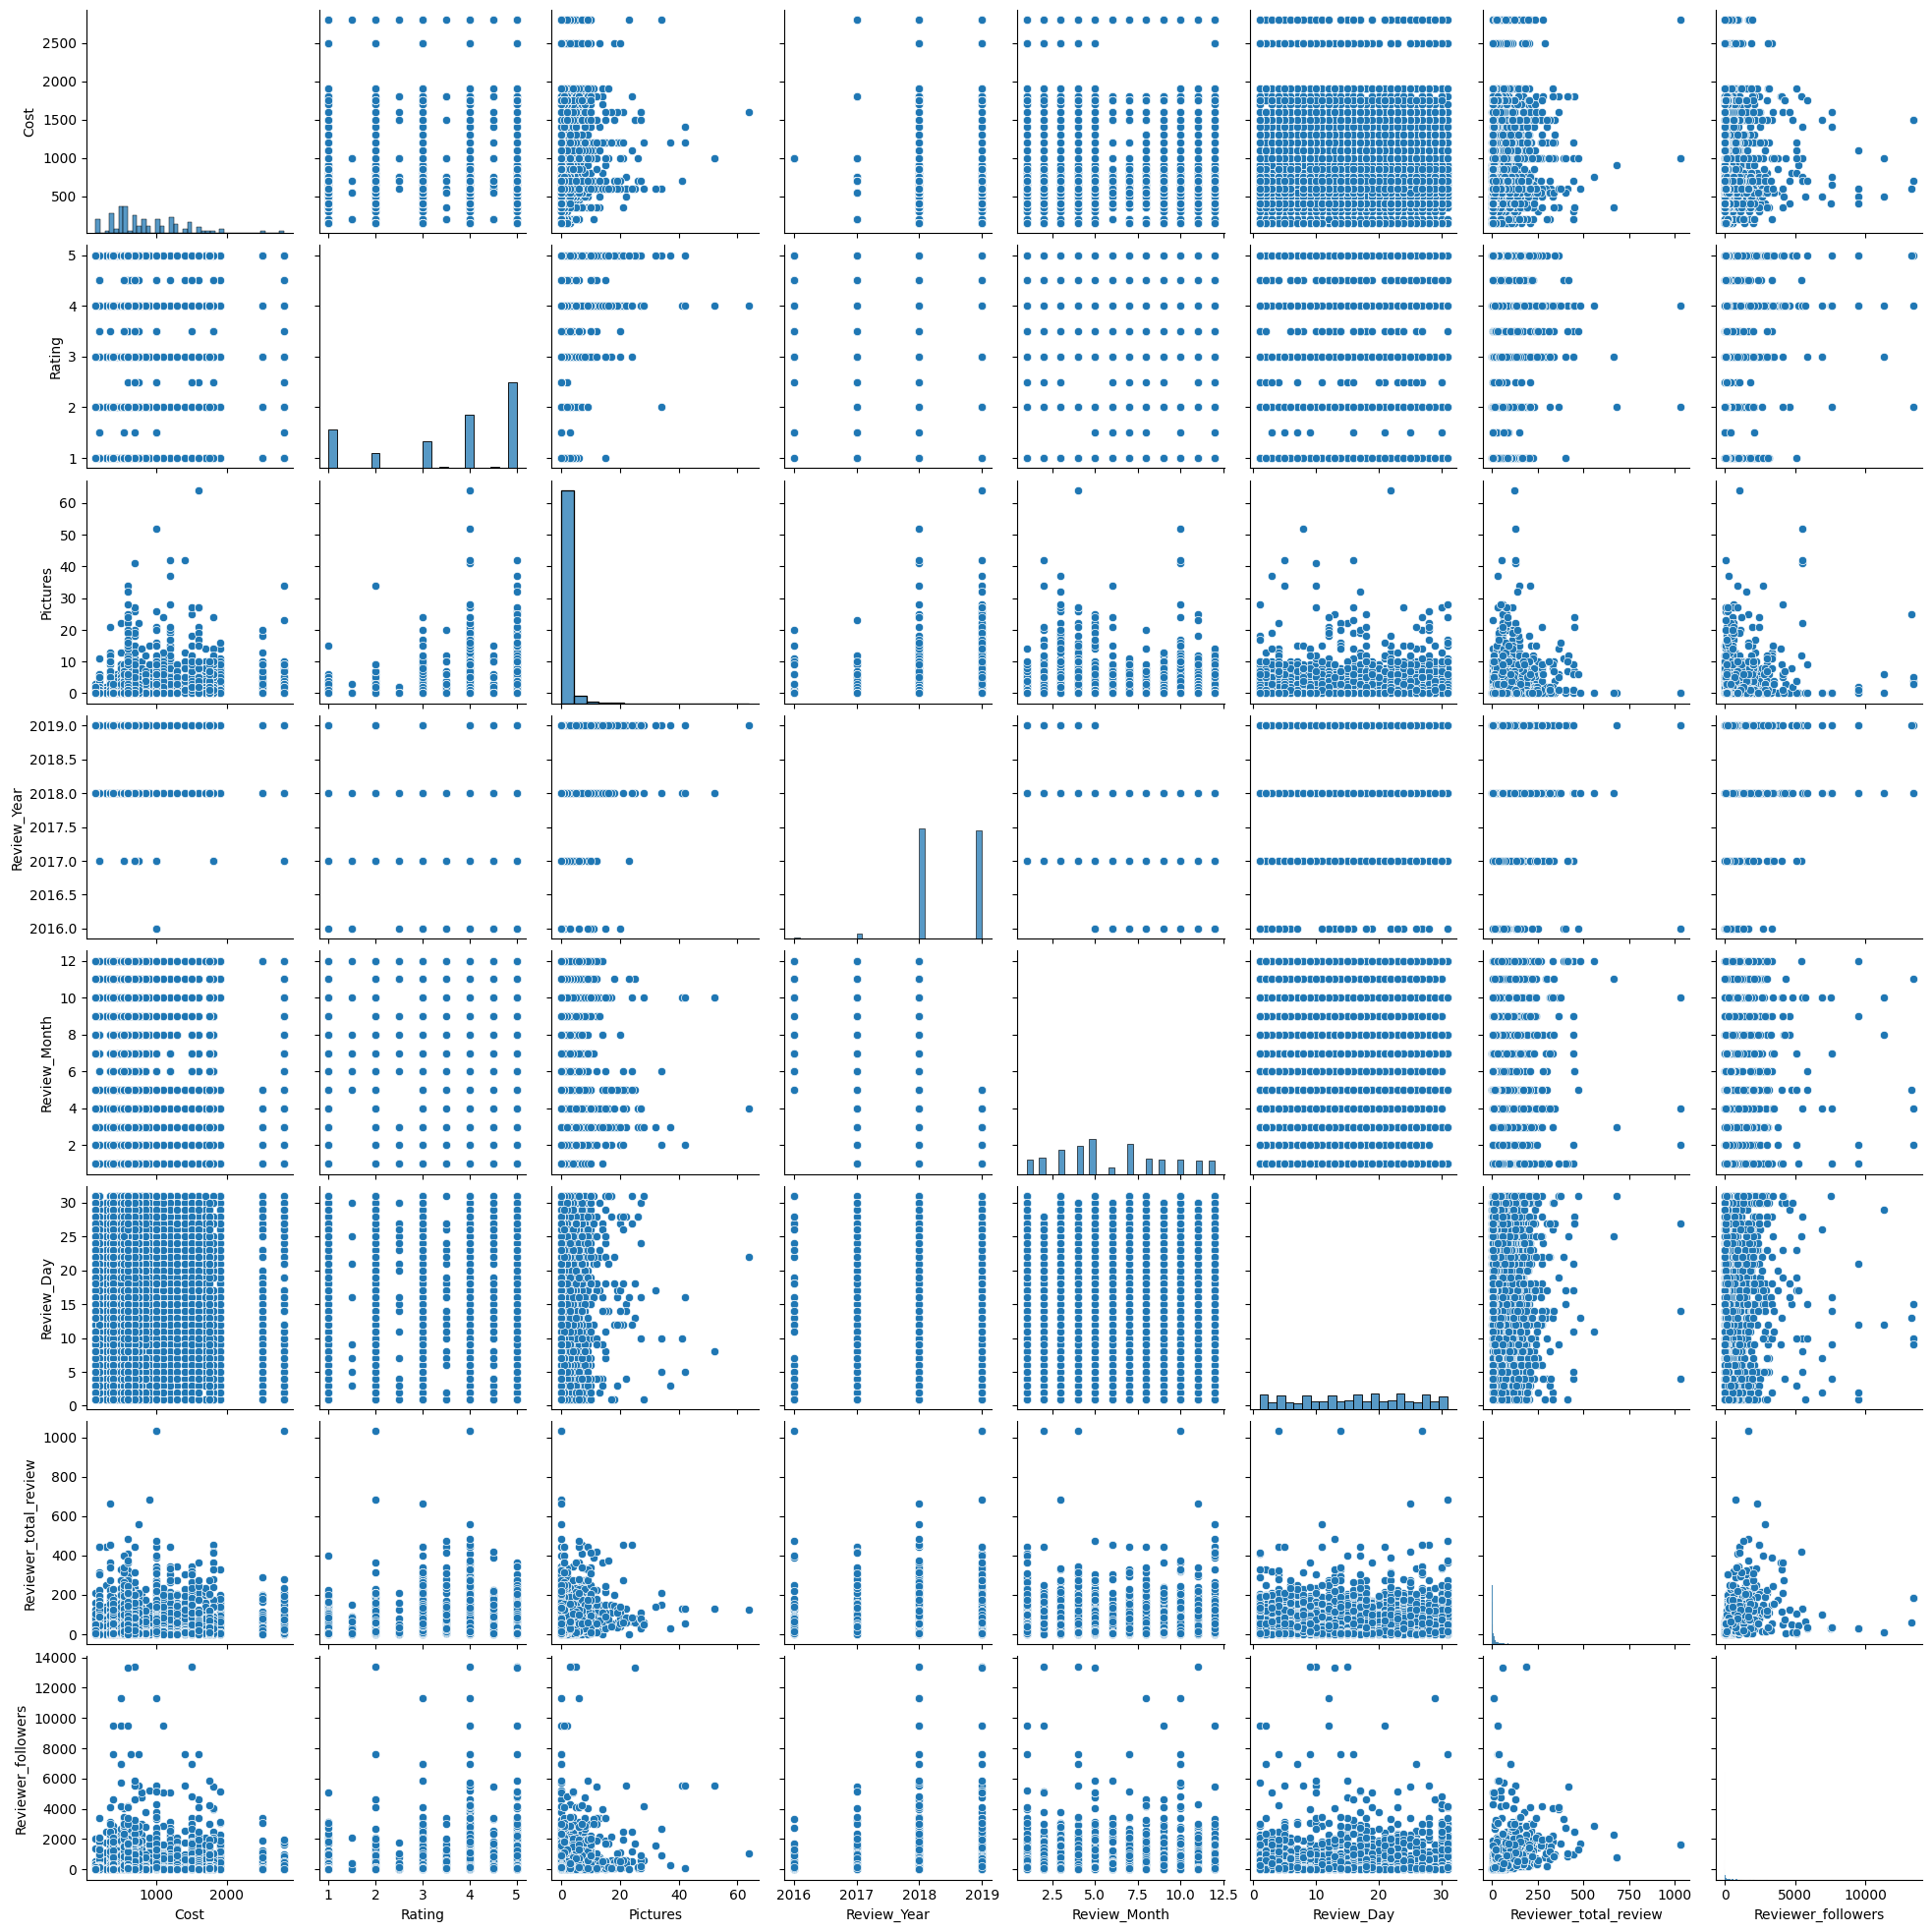

time: 34.4 s (started: 2023-07-13 17:57:23 +00:00)


In [106]:
# Pair Plot visualization code
sns.pairplot(df_inner)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***